In [ ]:
# input_file = 'trial_data_updated.txt'
# output_file = 'output_final.csv'

# with open(input_file, 'r') as infile:
#     lines = infile.readlines()

# with open(output_file, 'w') as outfile:
#     for line in lines:
#         # Remove leading and trailing whitespaces and split the line by space
#         values = line.strip().split(' ')

#         # Write the values to the CSV file
#         outfile.write(','.join(values) + '\n')

# print(f"Conversion completed. Output saved to {output_file}")


In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
headers=["s1", "s2", "s3", "s4", "s5", "a2", "a3", "a1", "a4", "t3", "t2", "t1", "total", "a1_apples", "a1_axe", "a1_arrow", "a2_apple", "a2_axe", "a2_ant", "a3_apple", "a3_alligator", "a3_axe", "a4_apple", "a4_alligator", "a4_ant", "a4_ambulance", "s1_sun", "s1_snake", "s1_swing", "s1_stone", "s2_stone", "s2_swing", "s2_spider", "s2_star", "s3_sun", "s3_spider", "s3_stone", "s3_snake", "t1_tap", "t1_tie", "t1_table", "t1_turtle", "t2_tree", "t2_table", "t2_tent", "t2_tomatos", "t3_tent", "t3_table", "t3_tiger", "t3_tamatoes","wrong", "correct", "name", "class"]


In [ ]:
df = pd.read_csv("output_final.csv", delimiter=',', header=None)
print(len(df.columns))
print(len(headers))

54
54


In [ ]:
if len(df.columns) != len(headers):
    raise ValueError("Number of columns in the CSV file does not match the number of headers.")
    print(len(df.columns))
    print(len(headers))
# Set the headers
df.columns = headers



In [ ]:
df[["s1", "s2", "s3", "s4", "s5", "a2", "a3", "a1", "a4", "t3", "t2", "t1", "total", "a1_apples", "a1_axe", "a1_arrow", "a2_apple", "a2_axe", "a2_ant", "a3_apple", "a3_alligator", "a3_axe", "a4_apple", "a4_alligator", "a4_ant", "a4_ambulance", "s1_sun", "s1_snake", "s1_swing", "s1_stone", "s2_stone", "s2_swing", "s2_spider", "s2_star", "s3_sun", "s3_spider", "s3_stone", "s3_snake", "t1_tap", "t1_tie", "t1_table", "t1_turtle", "t2_tree", "t2_table", "t2_tent", "t2_tomatos", "t3_tent", "t3_table", "t3_tiger", "t3_tamatoes"]
] /= 1000

In [ ]:
df['a1'] -= 2
df['a3'] -= 2
#as in the code time for a1 and a3 is defined after sleep(2.0)

In [ ]:
# Count the number of rows where 'a4' is 0
num_zero_a4 = df[df['a4'] == 0].shape[0]
print(f"Number of rows with a value of 0 in 'a4': {num_zero_a4}")


Number of rows with a value of 0 in 'a4': 16


In [ ]:
# Set 'a4' to the maximum value among 'a4_apple', 'a4_alligator', 'a4_ant', and 'a4_ambulance'
df['a4'] = df[['a4_apple', 'a4_alligator', 'a4_ant', 'a4_ambulance']].max(axis=1)




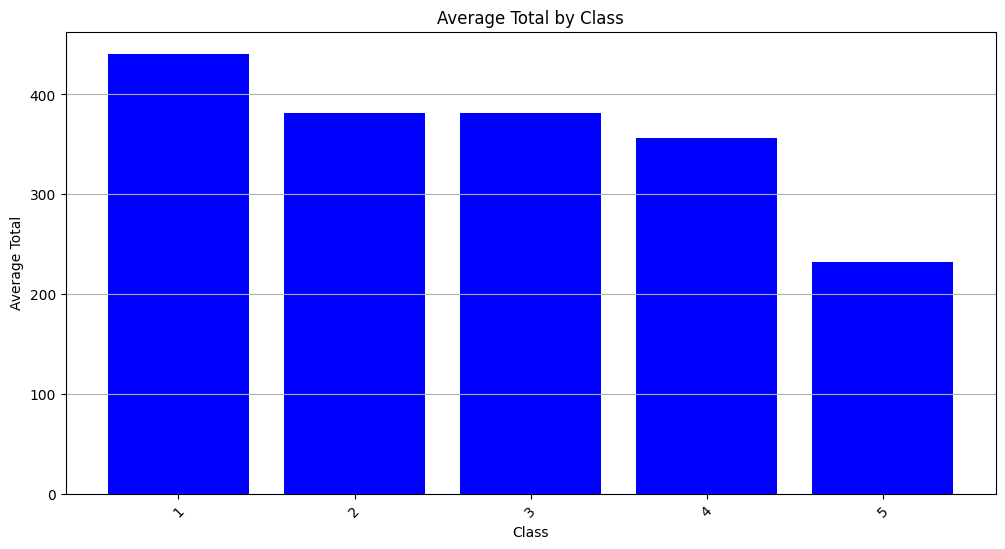

In [ ]:
average_total_by_class = df.groupby('class')['total'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(average_total_by_class['class'], average_total_by_class['total'], color='blue')
plt.xlabel('Class')
plt.ylabel('Average Total')
plt.title('Average Total by Class')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

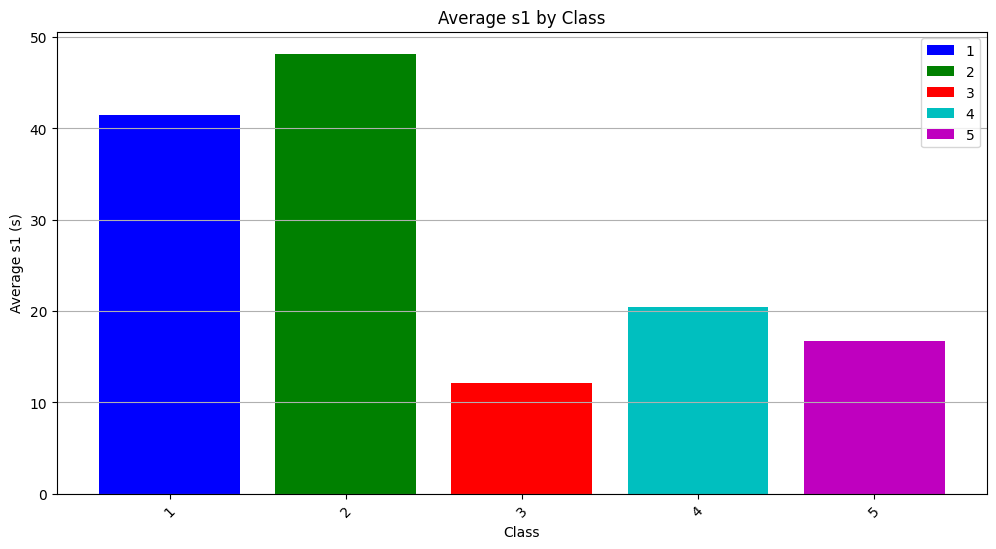

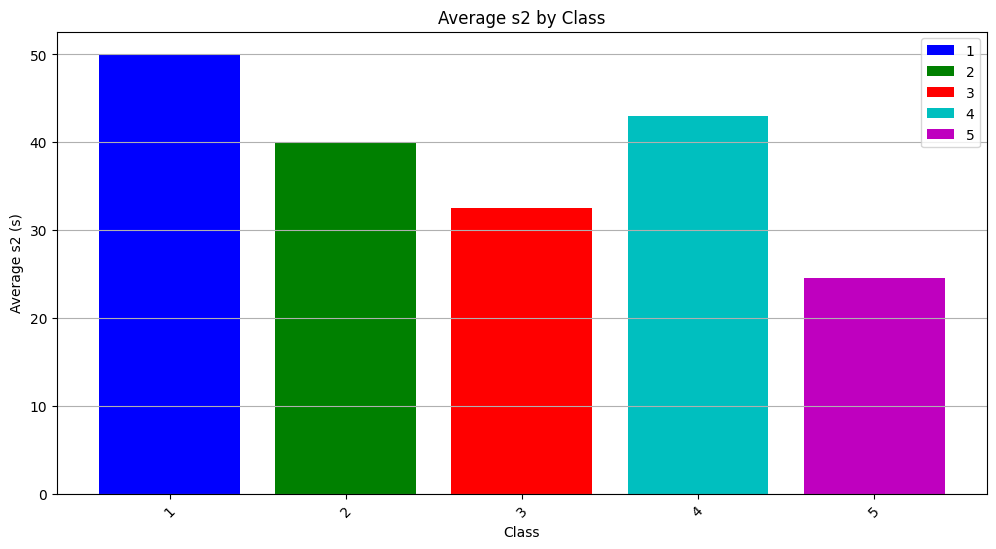

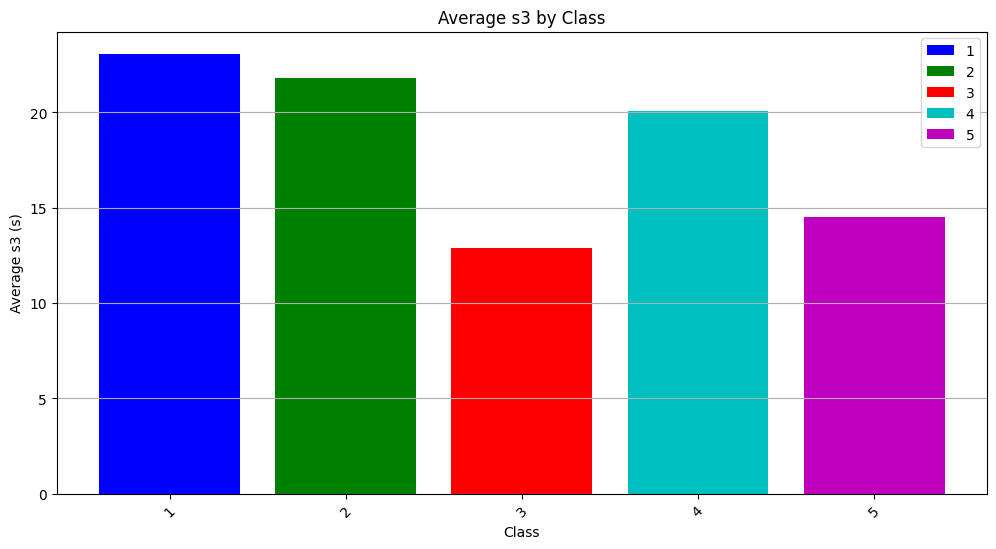

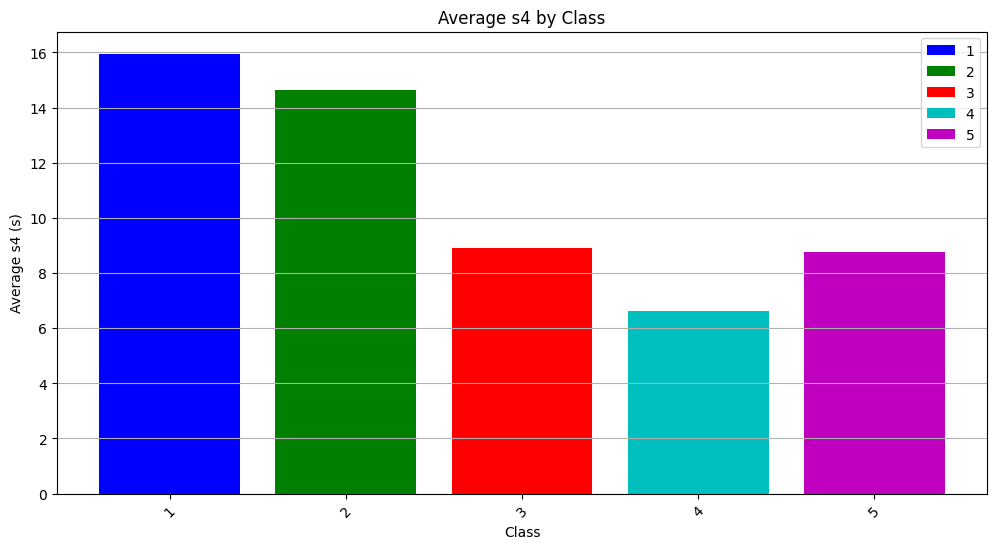

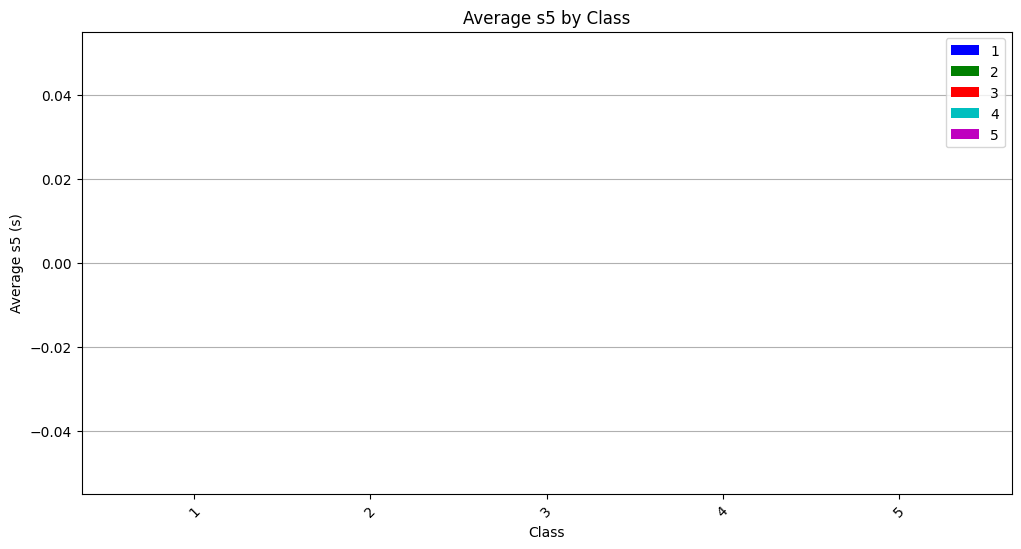

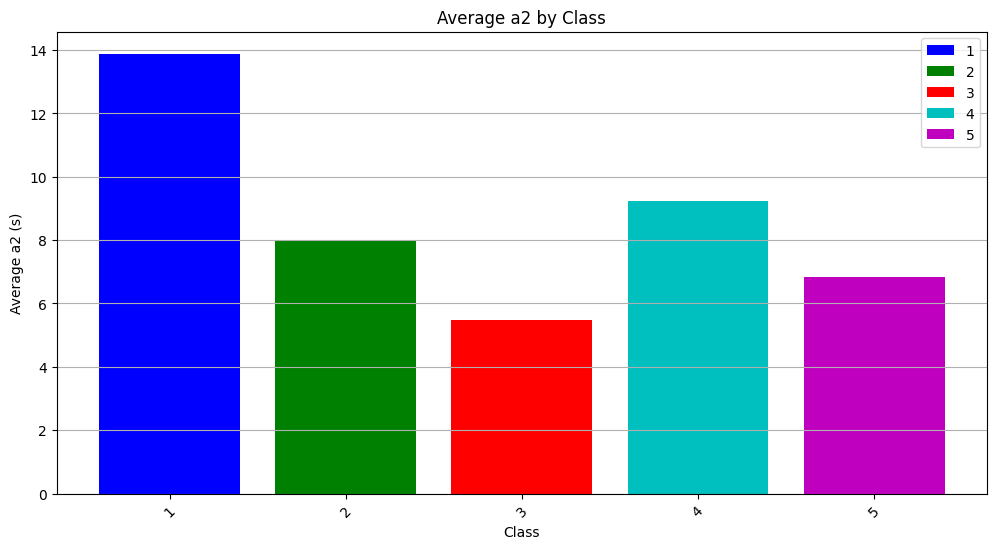

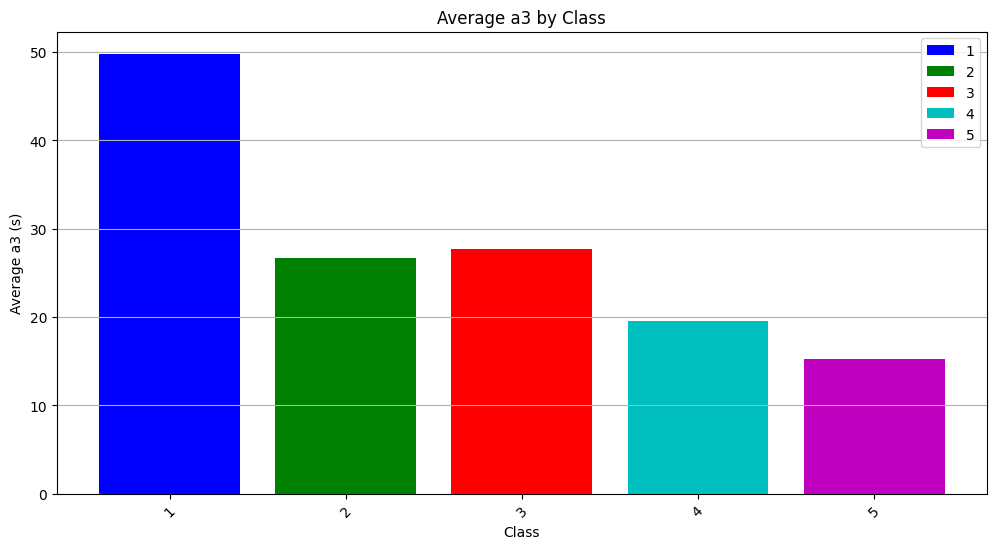

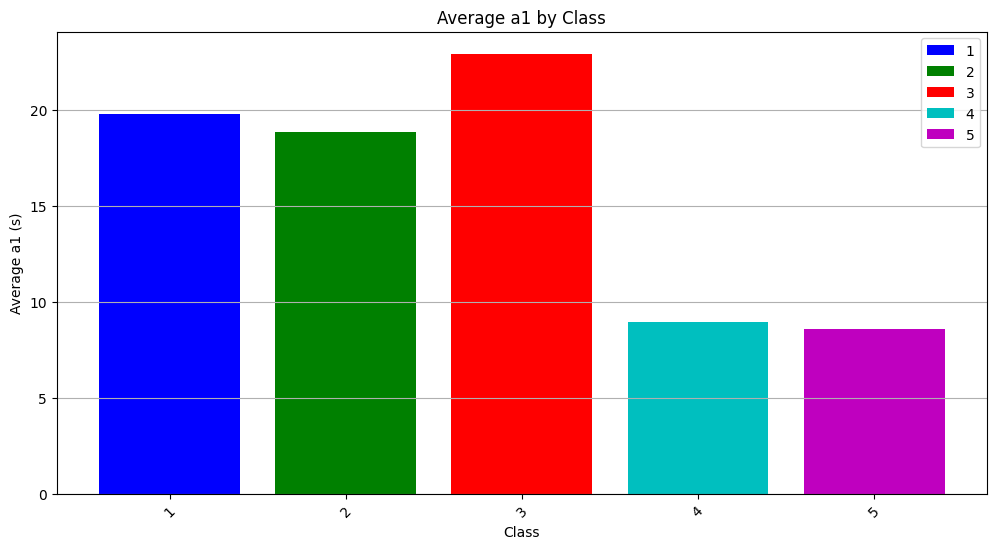

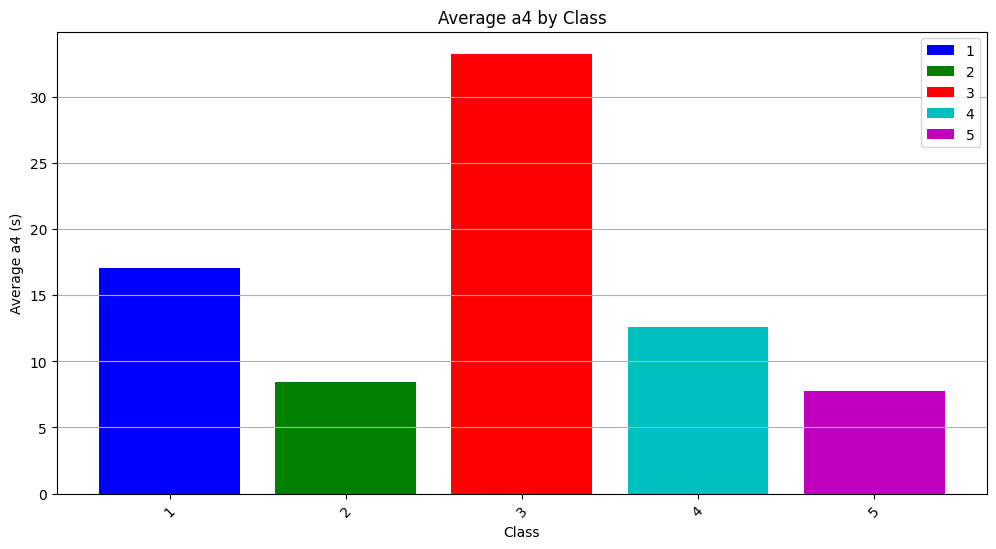

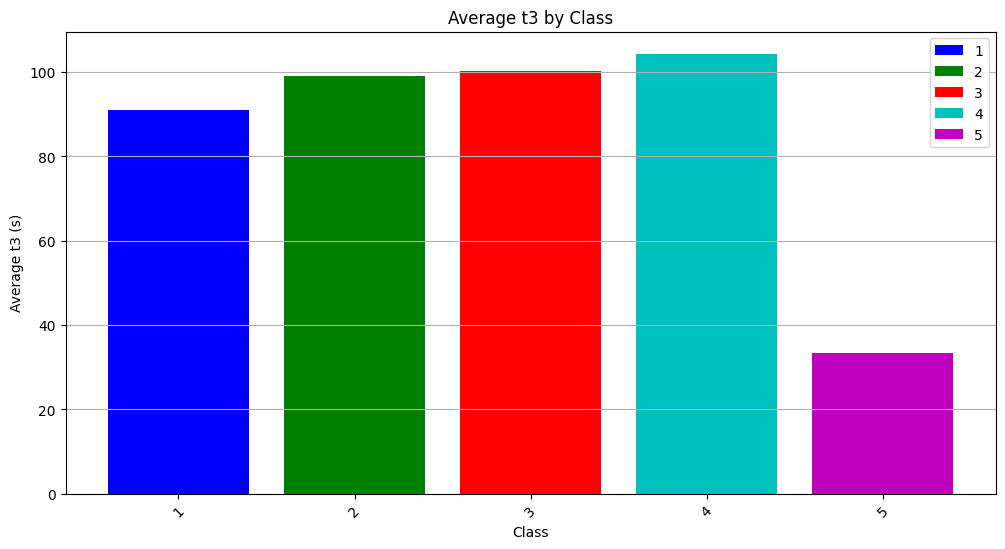

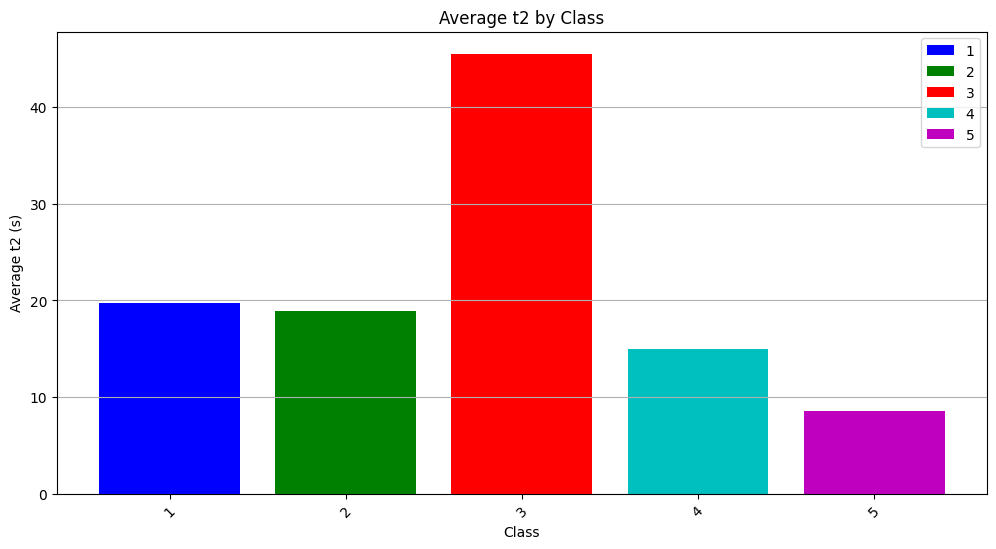

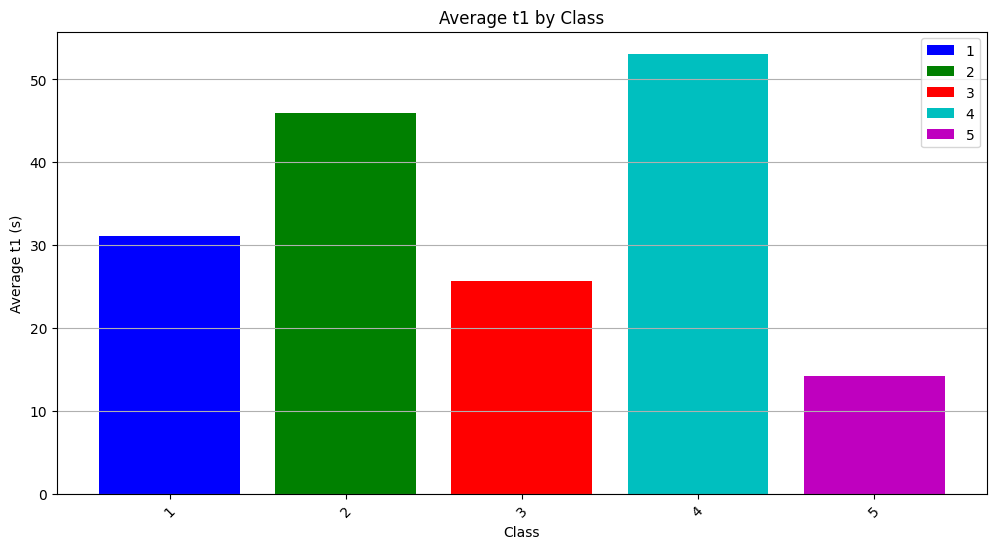

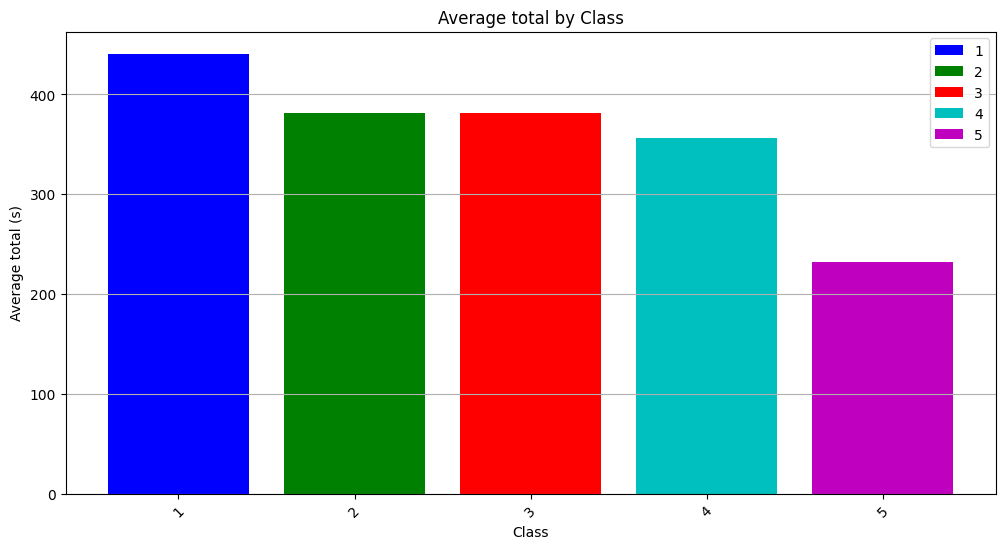

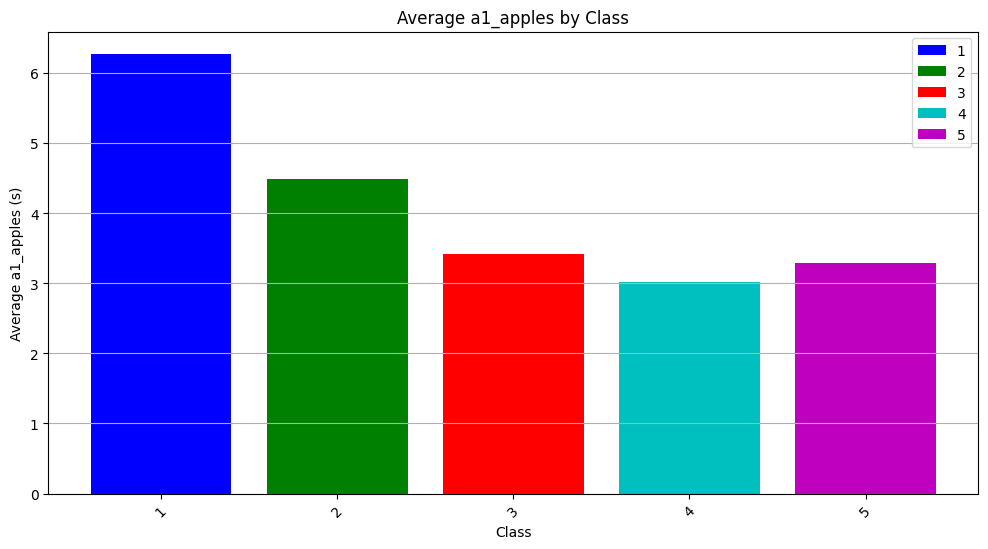

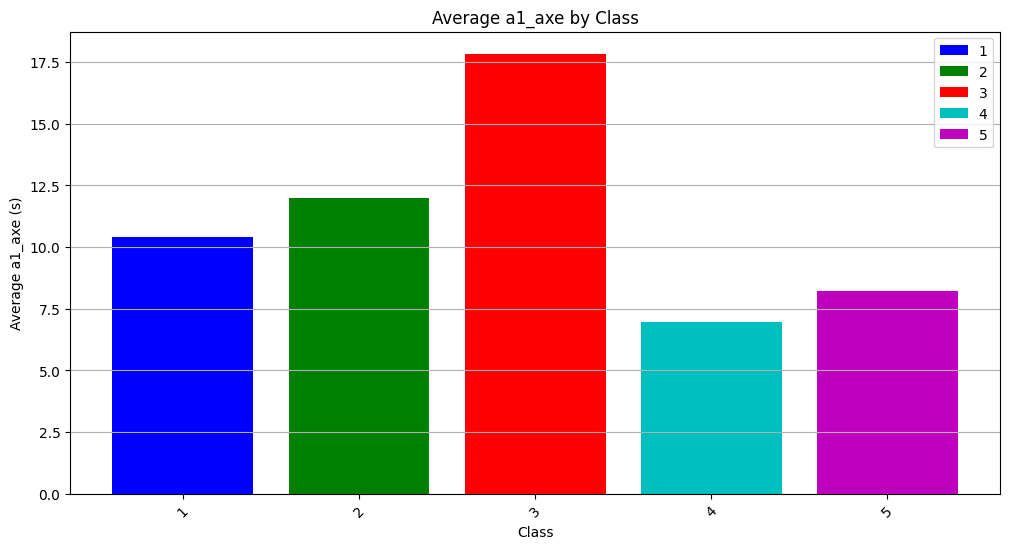

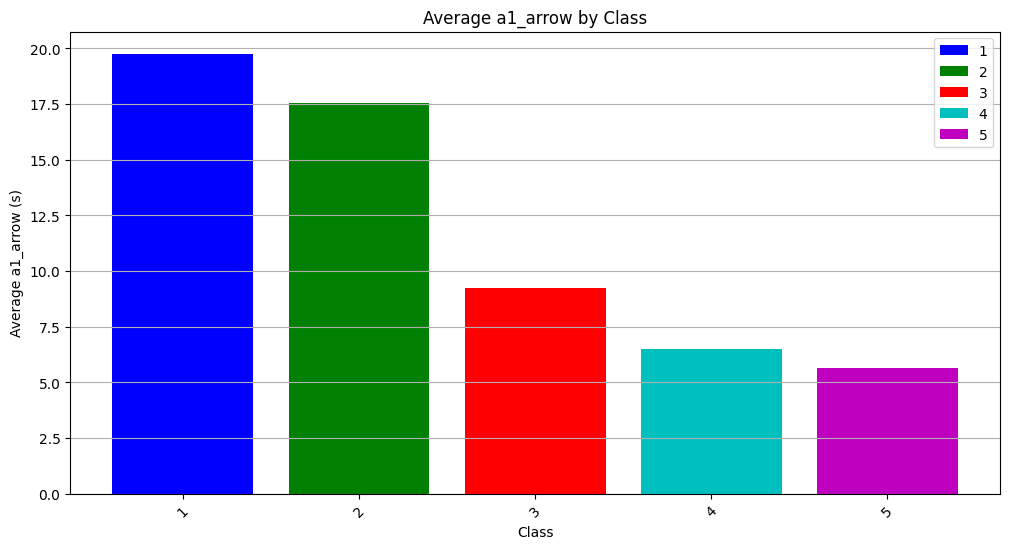

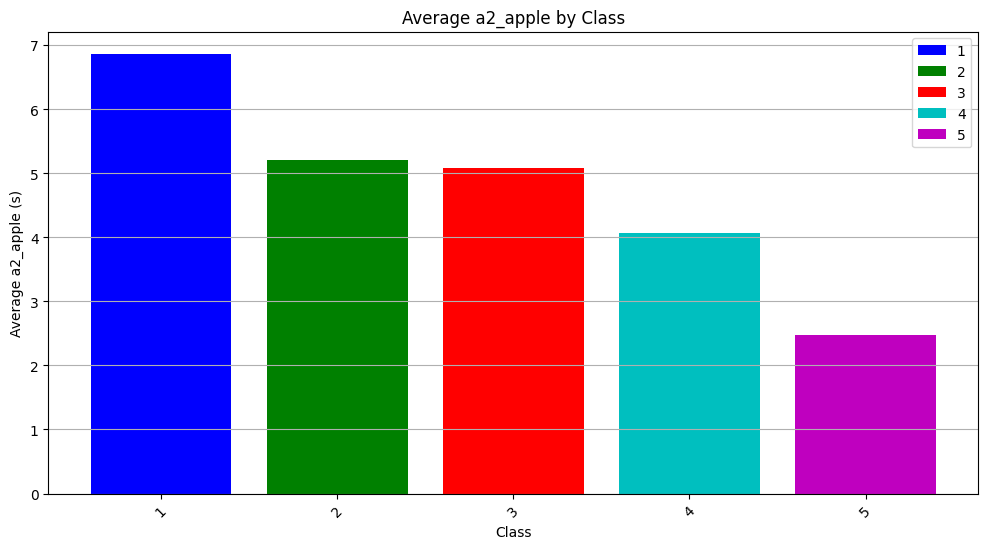

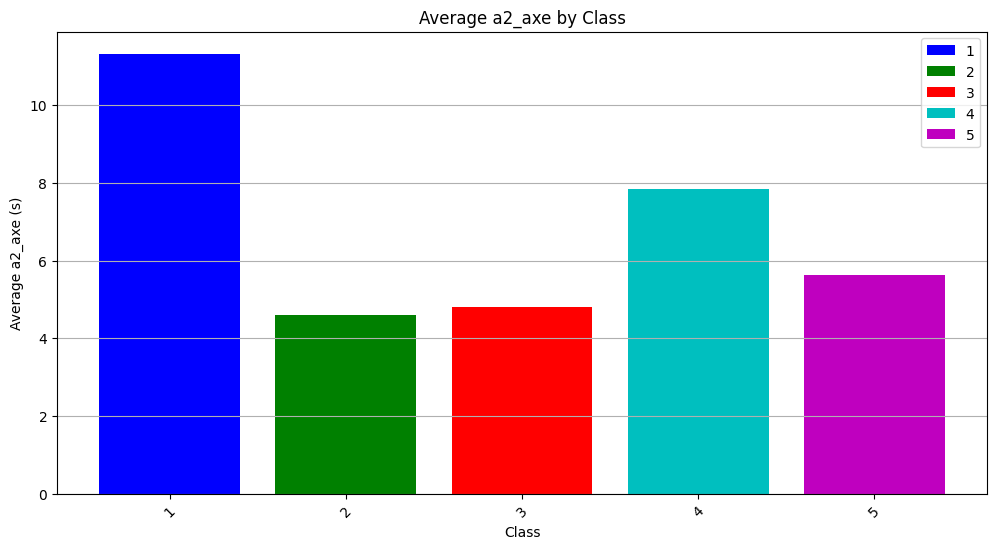

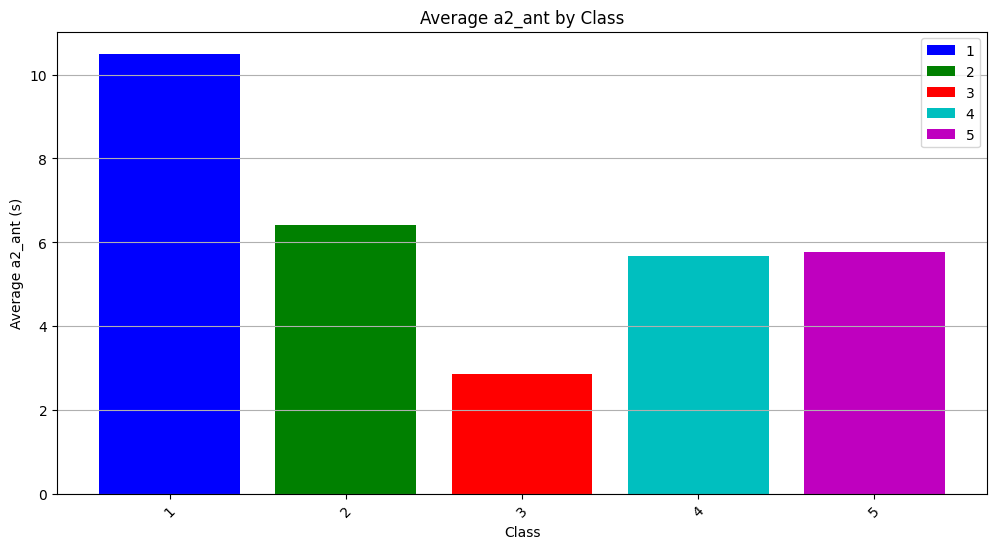

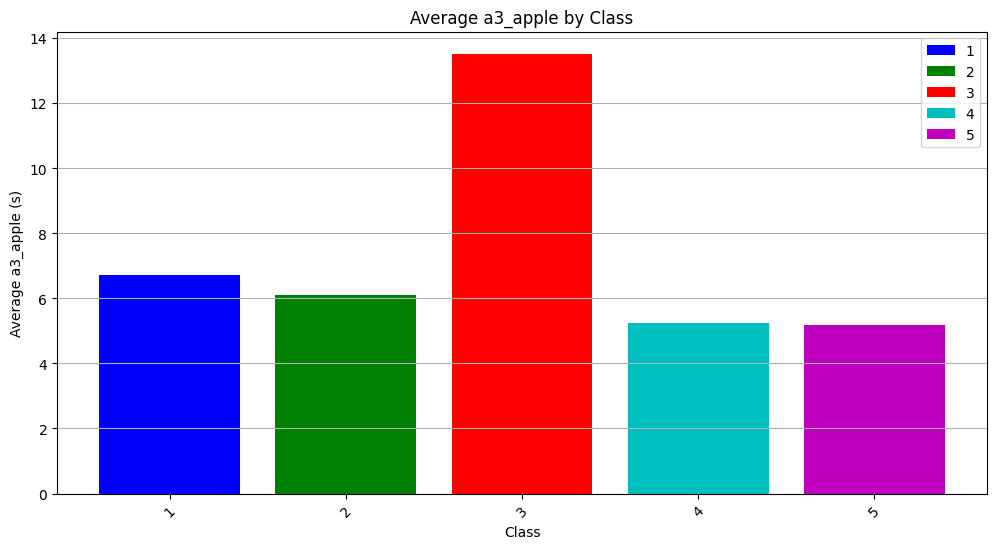

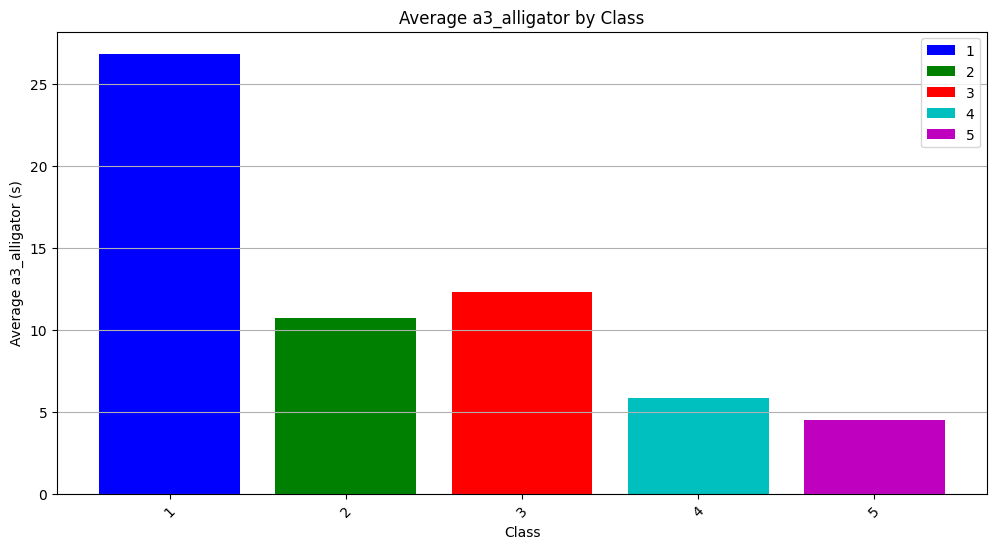

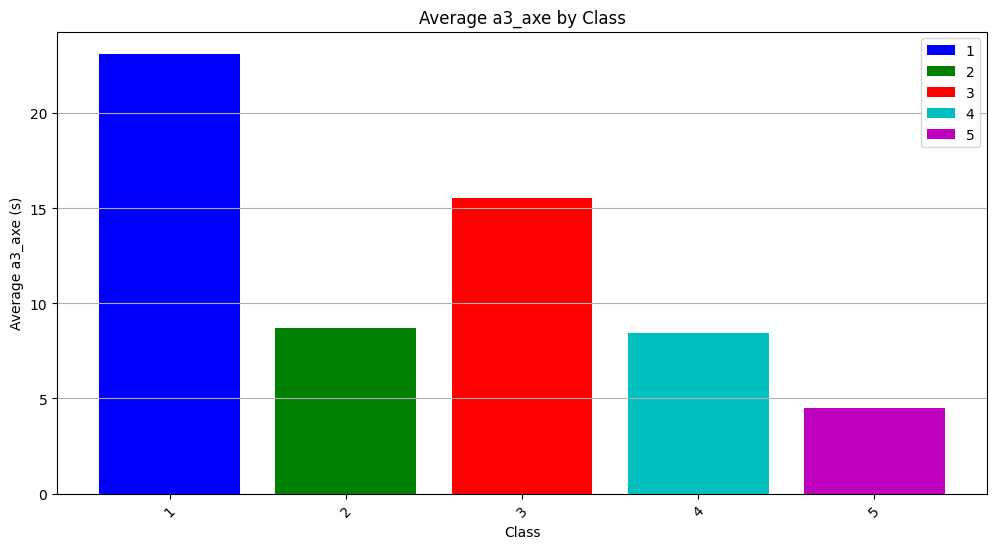

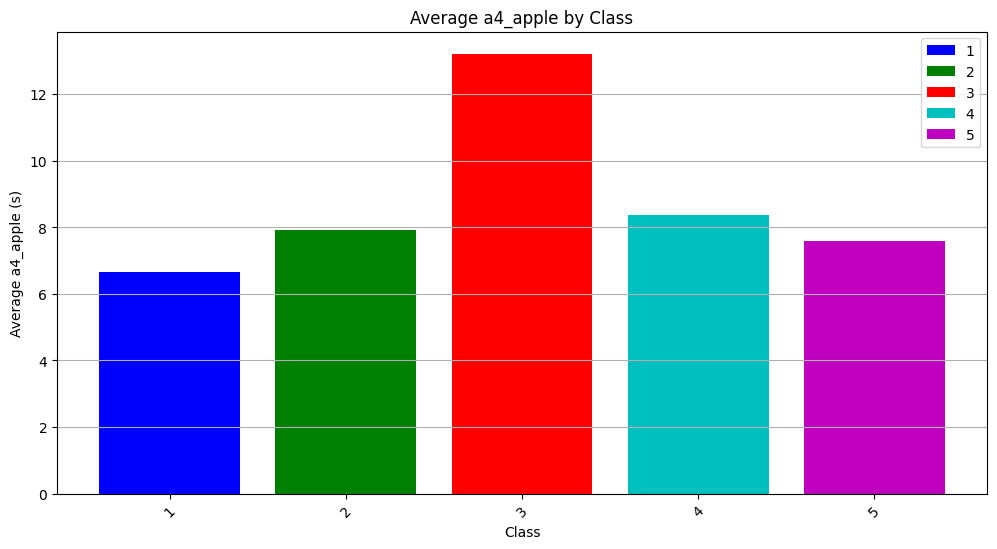

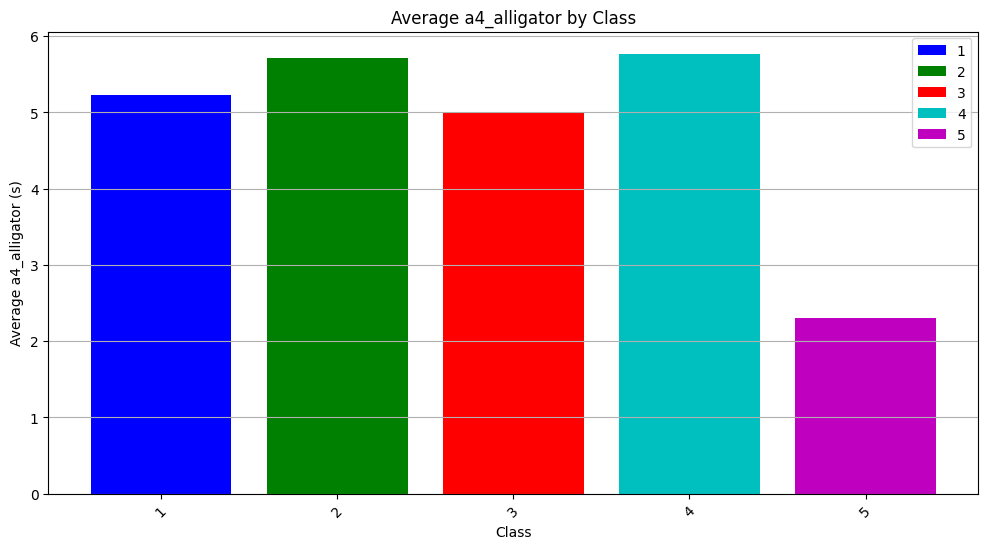

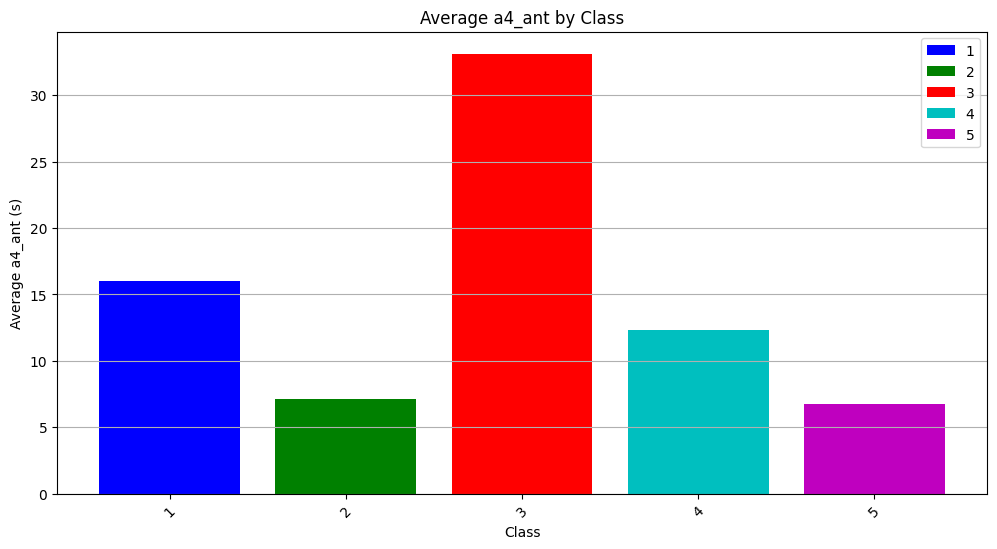

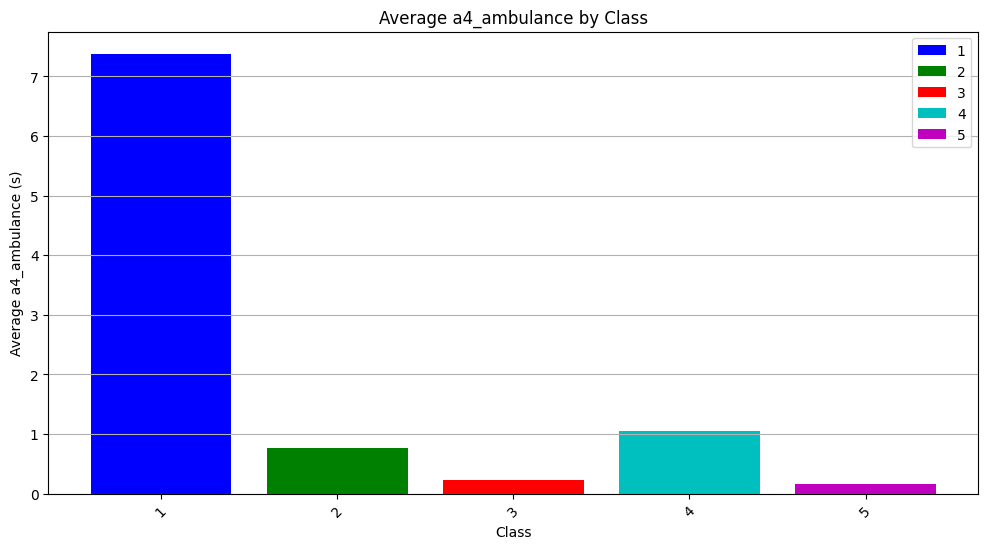

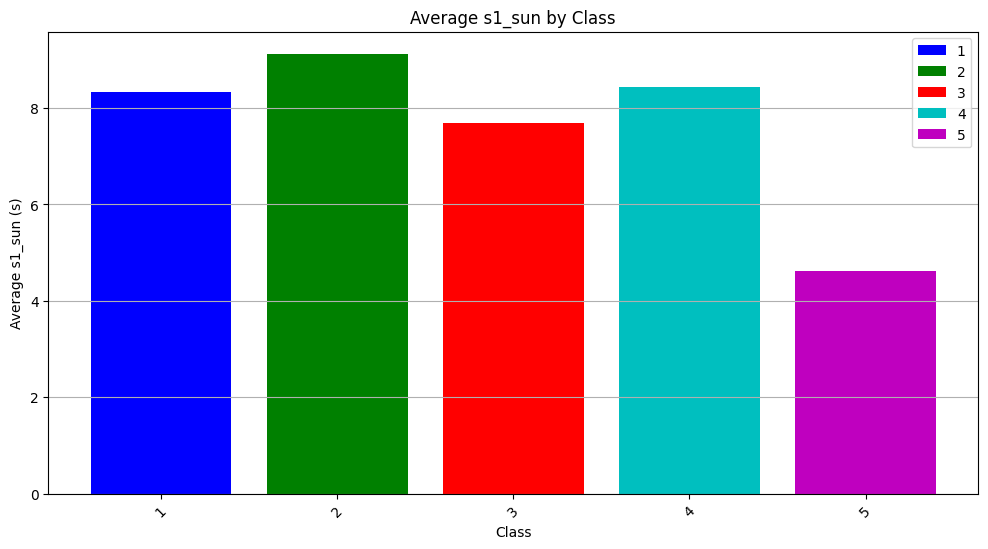

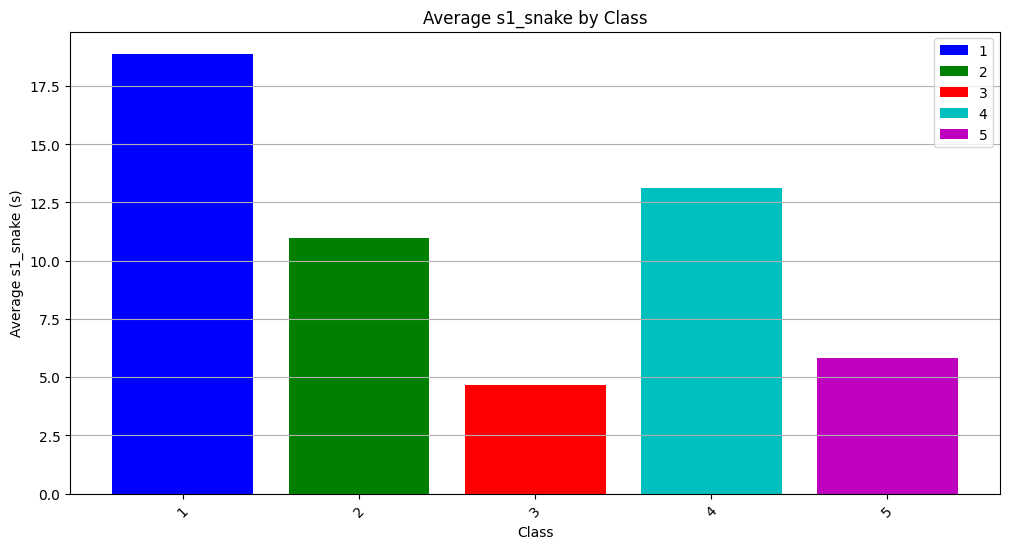

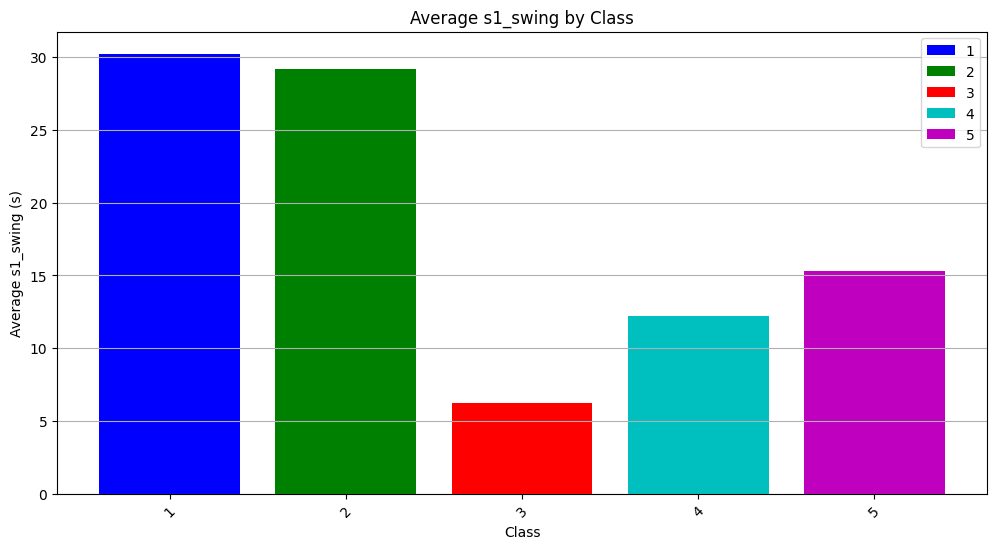

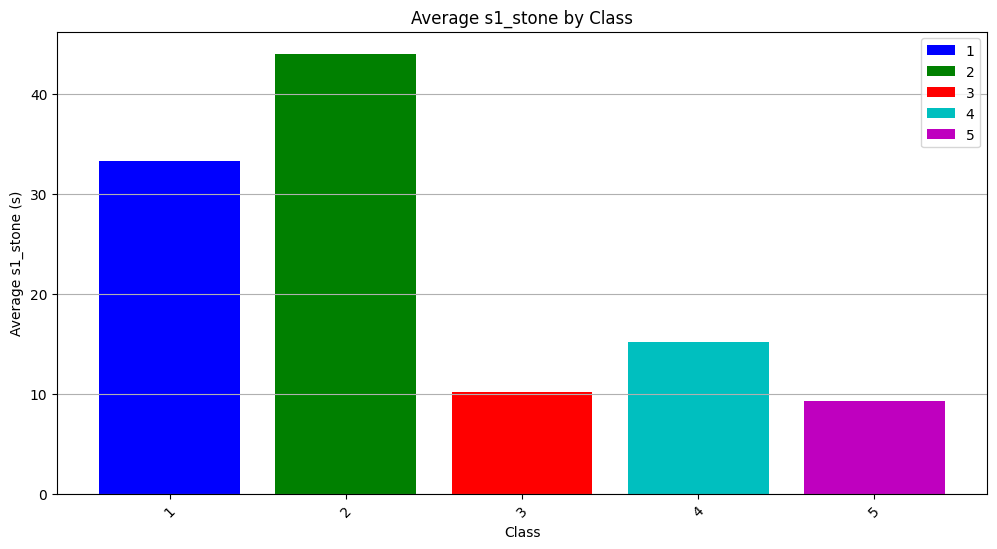

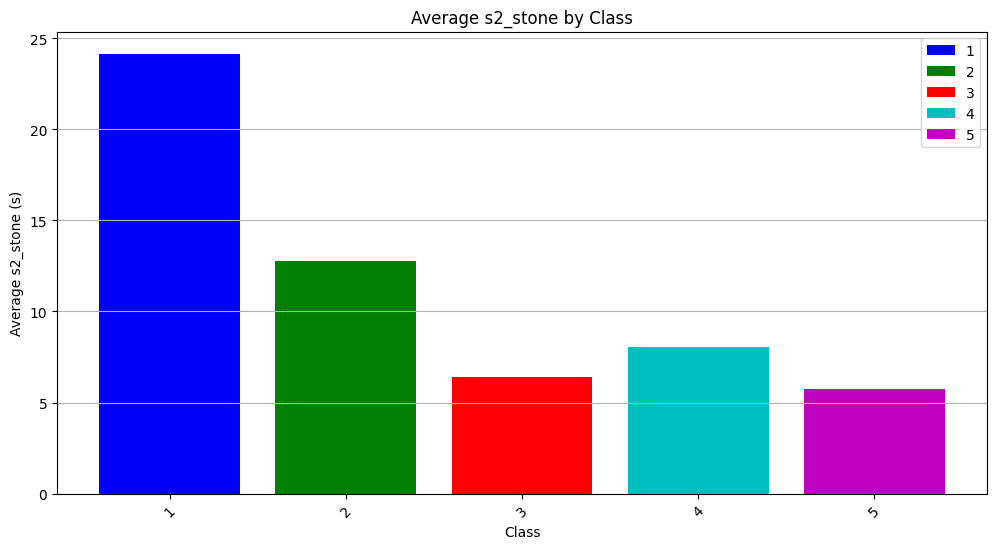

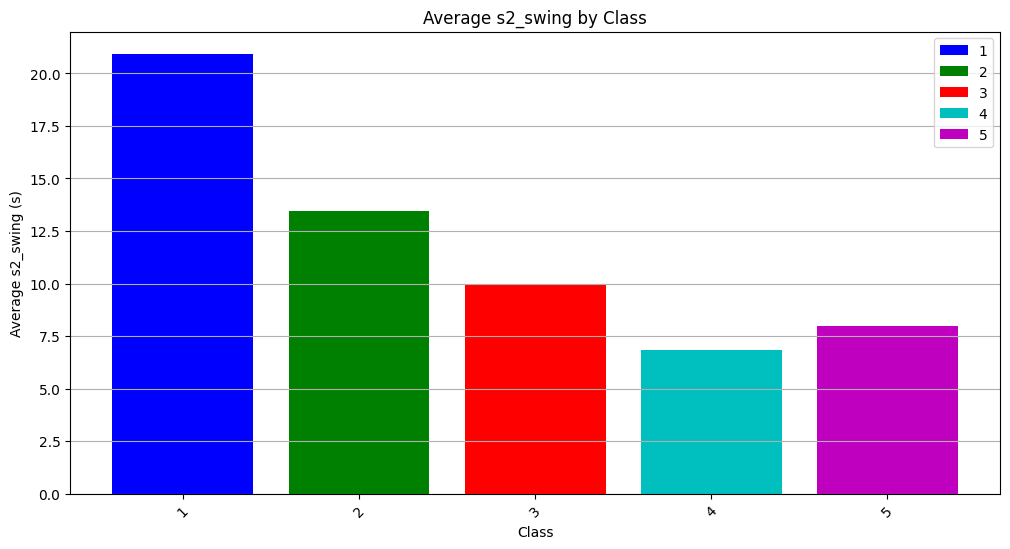

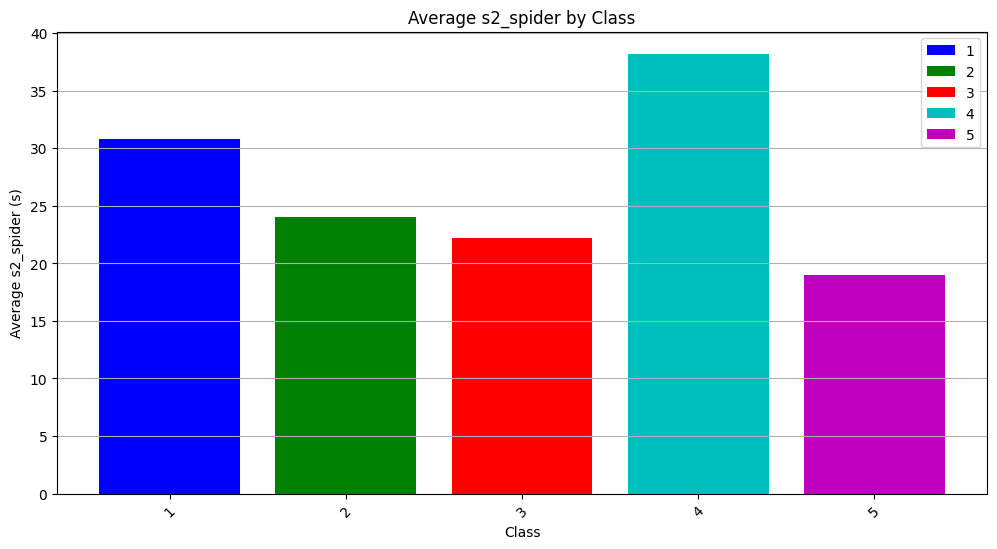

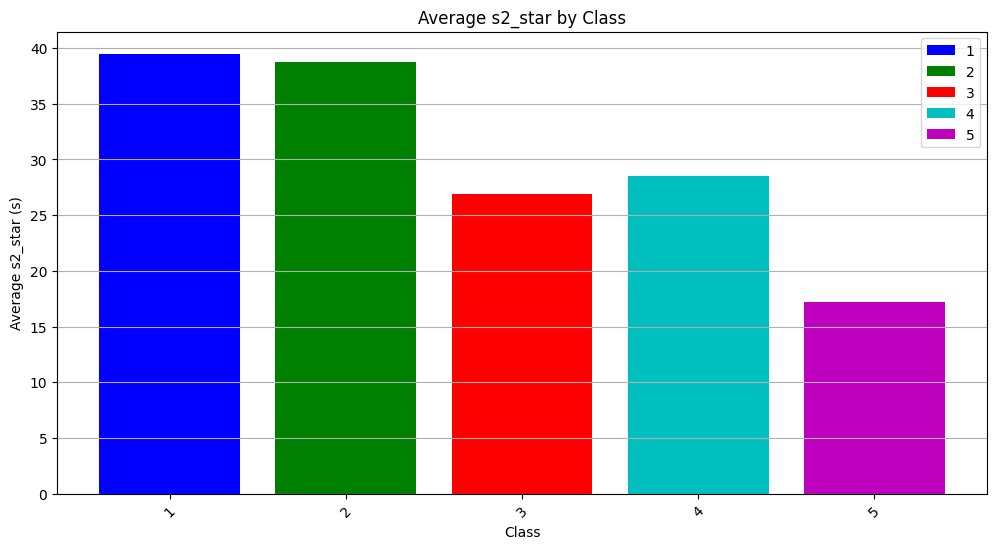

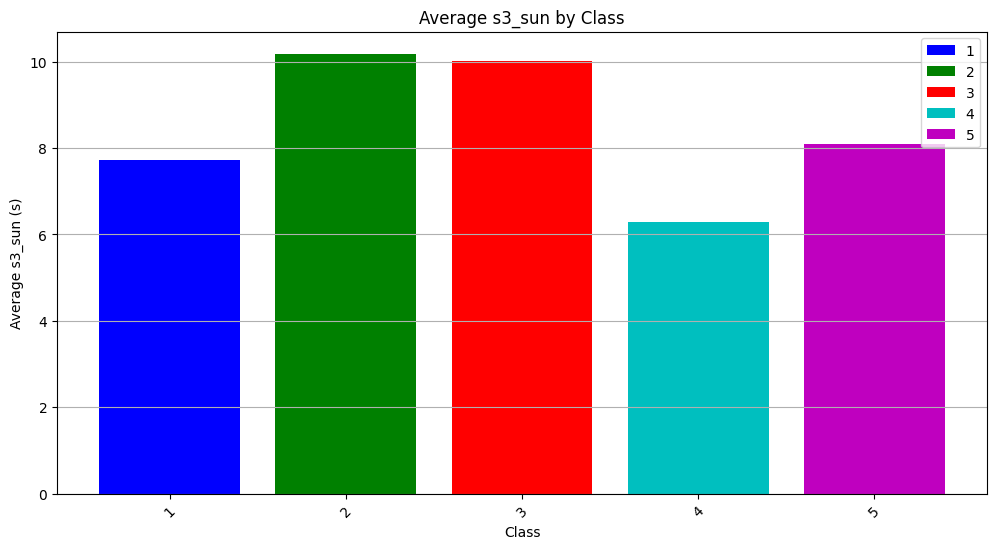

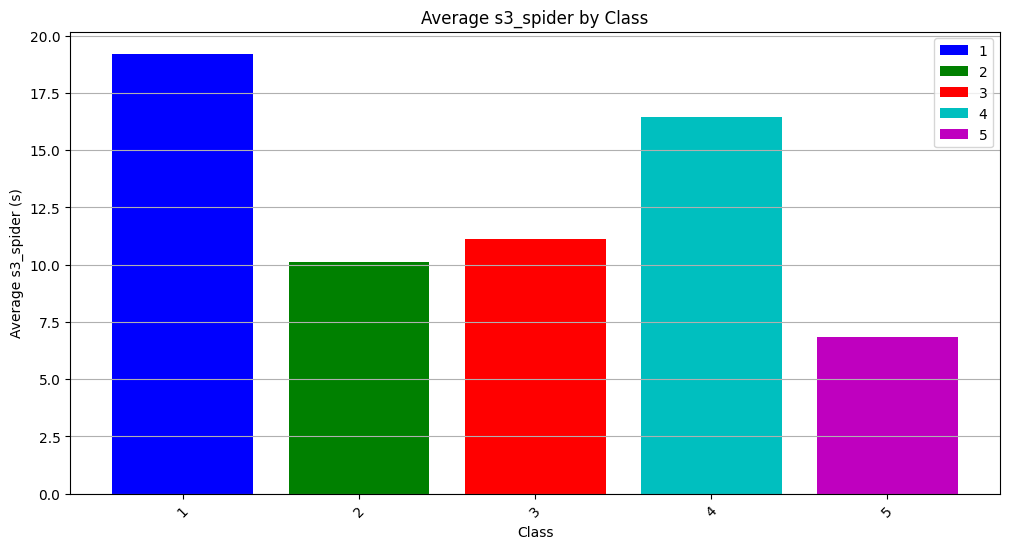

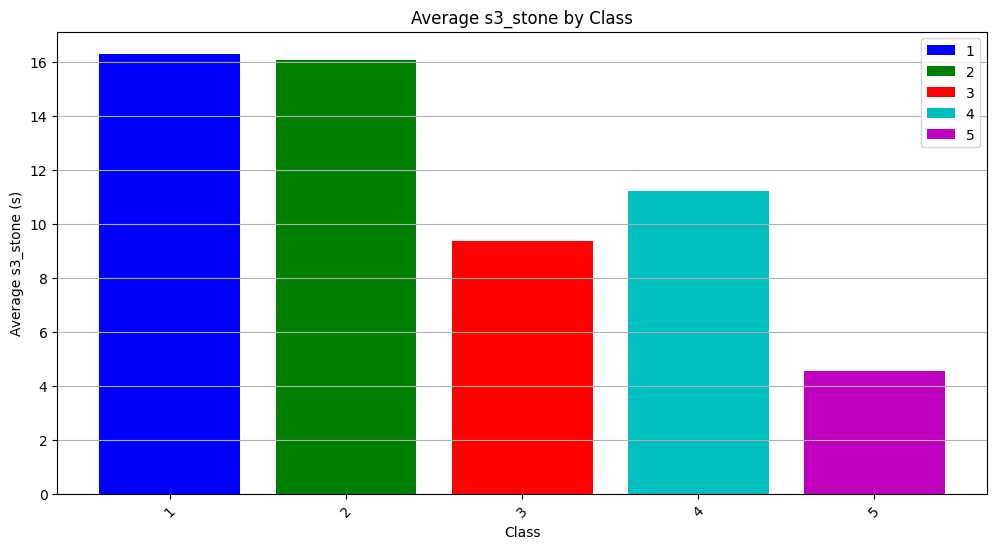

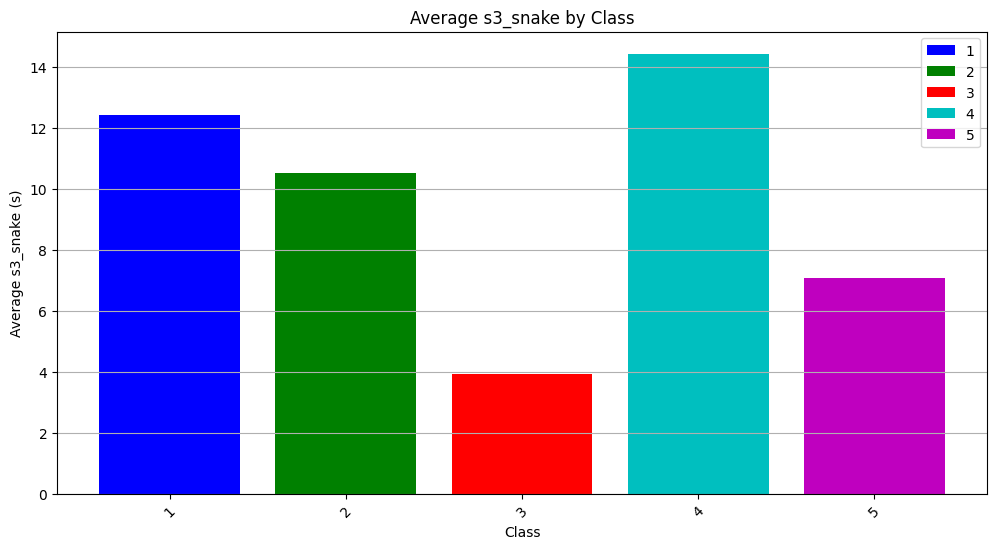

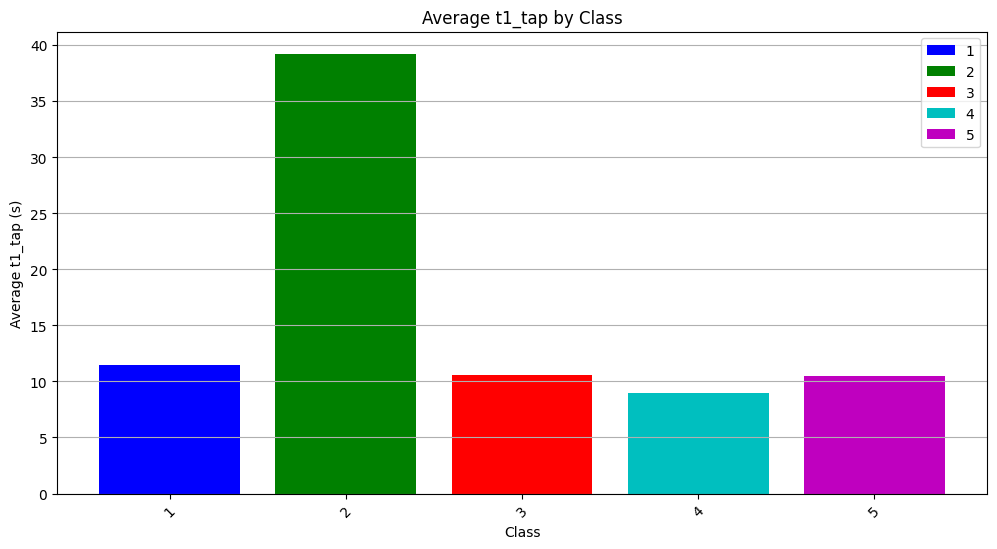

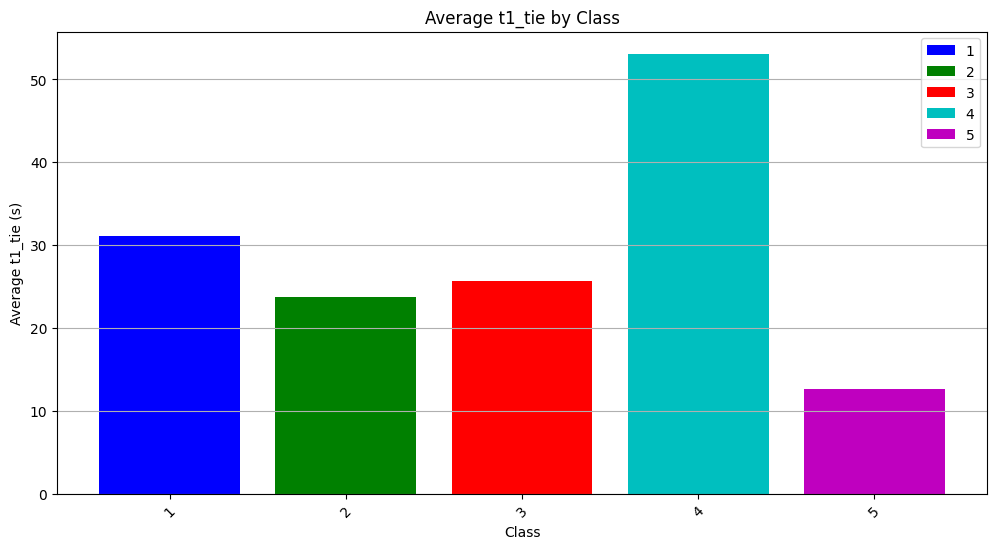

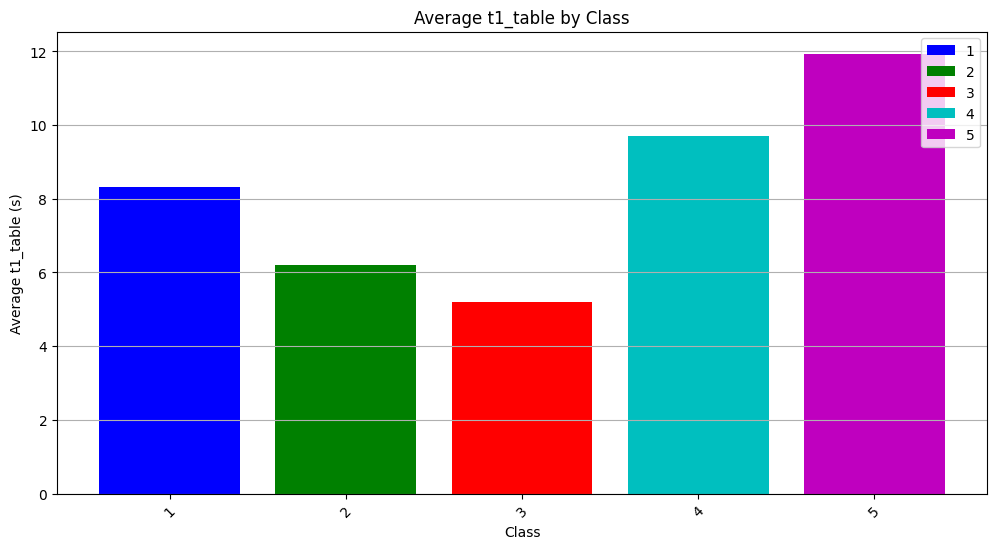

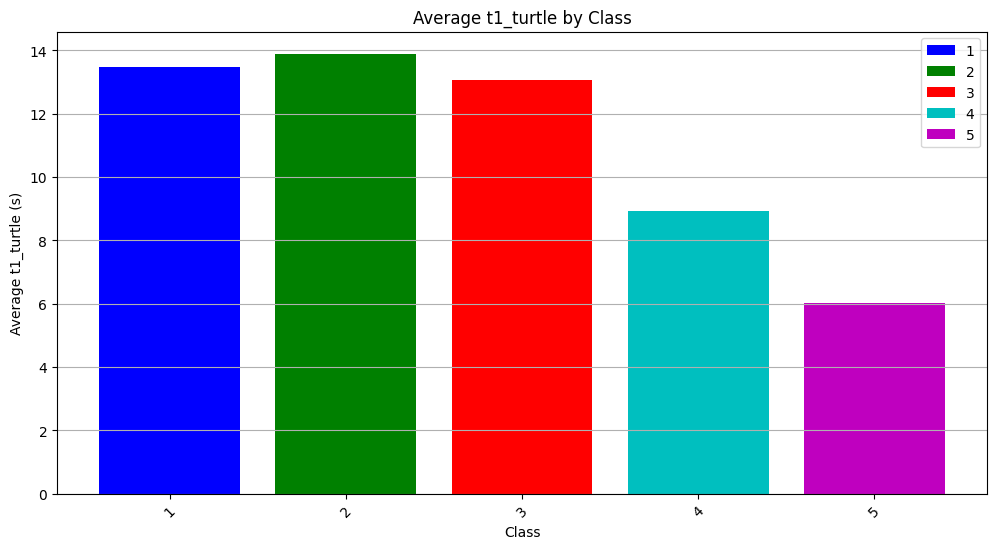

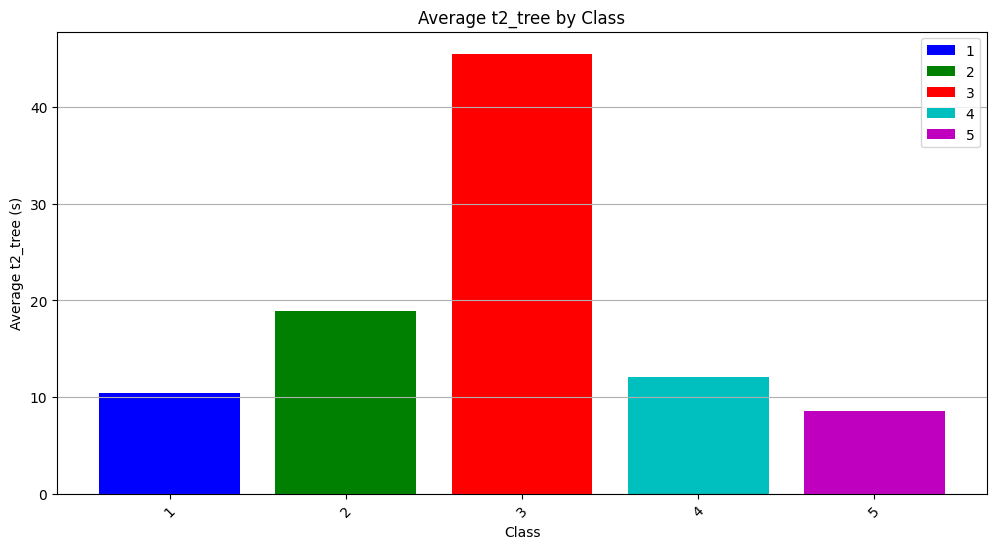

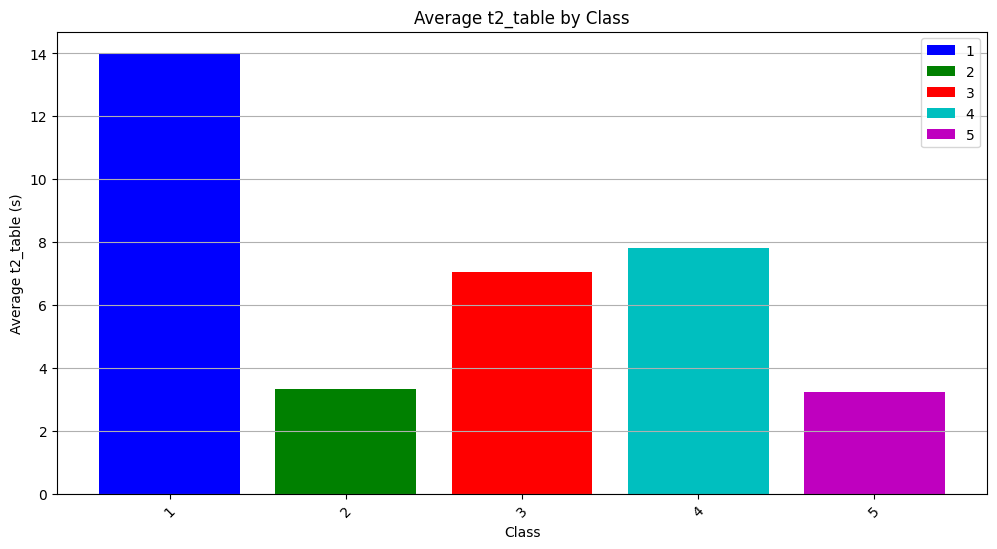

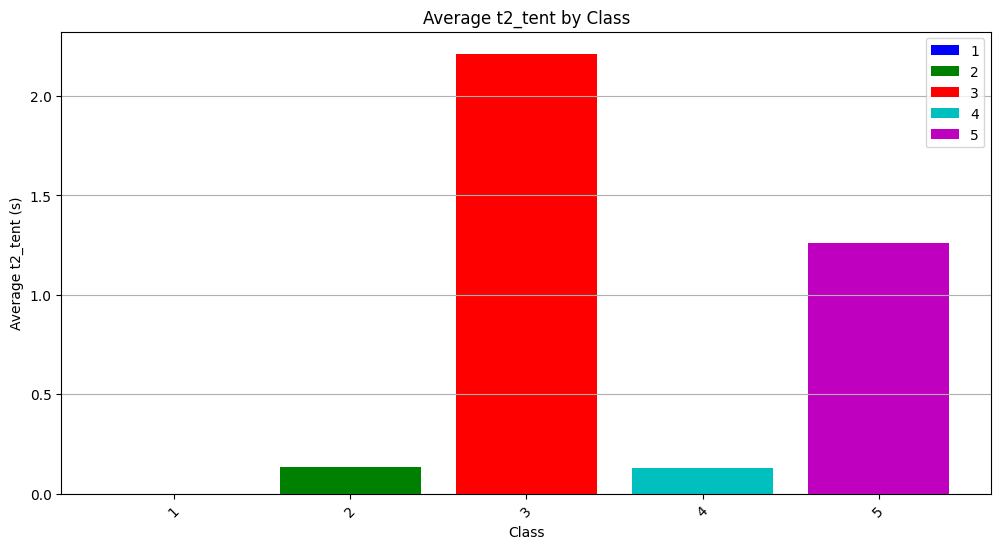

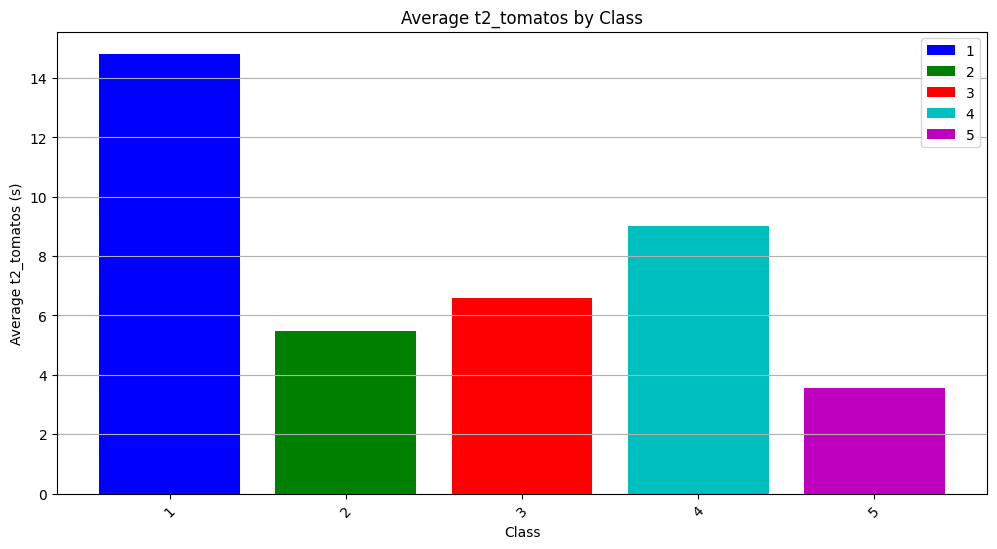

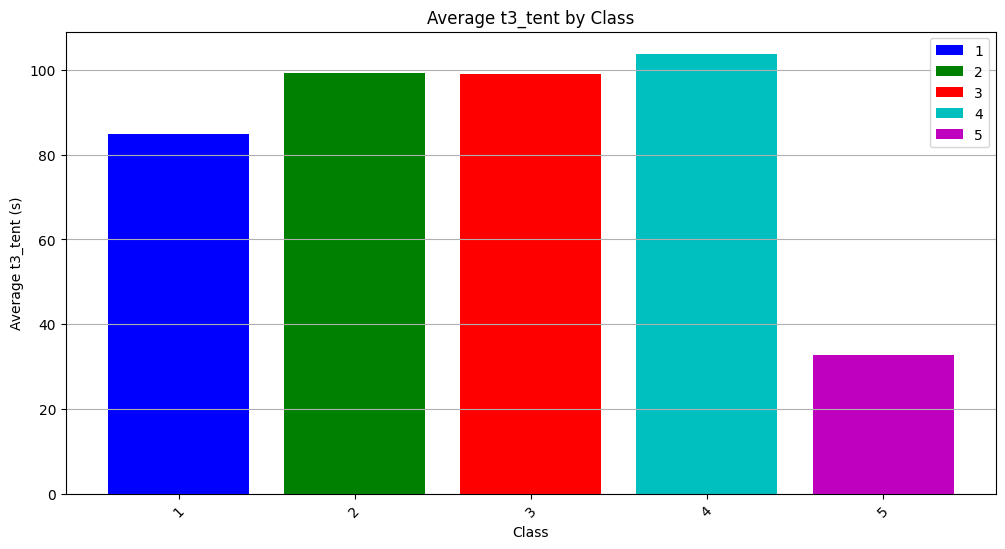

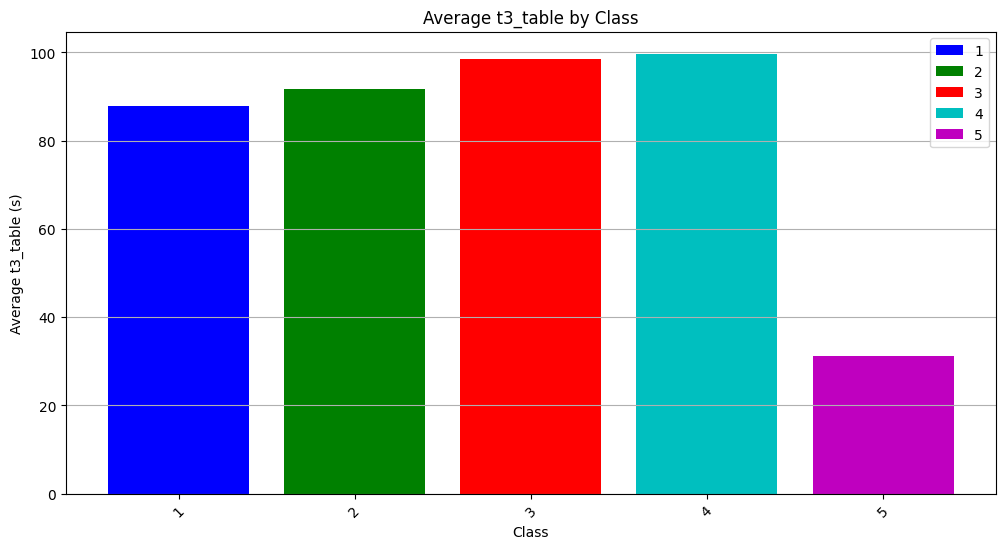

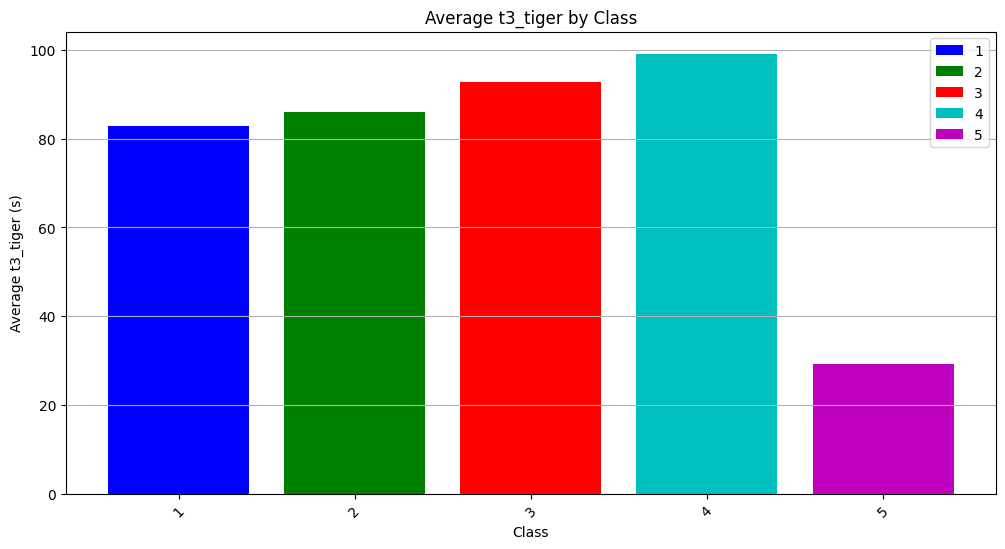

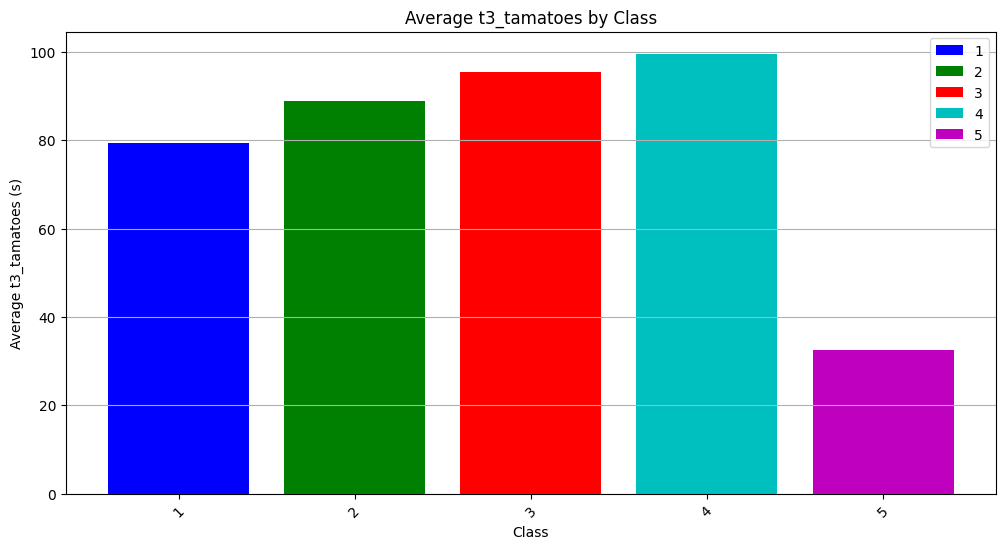

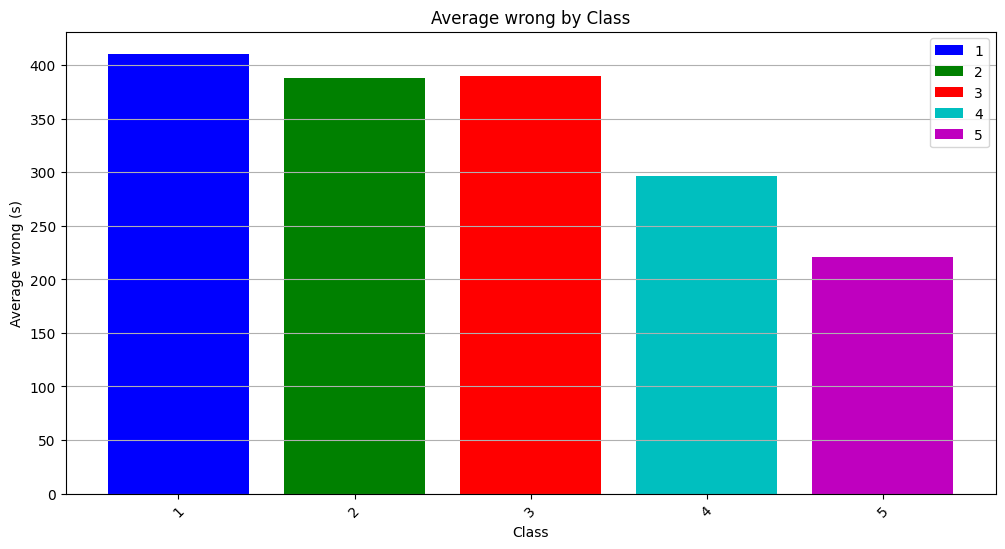

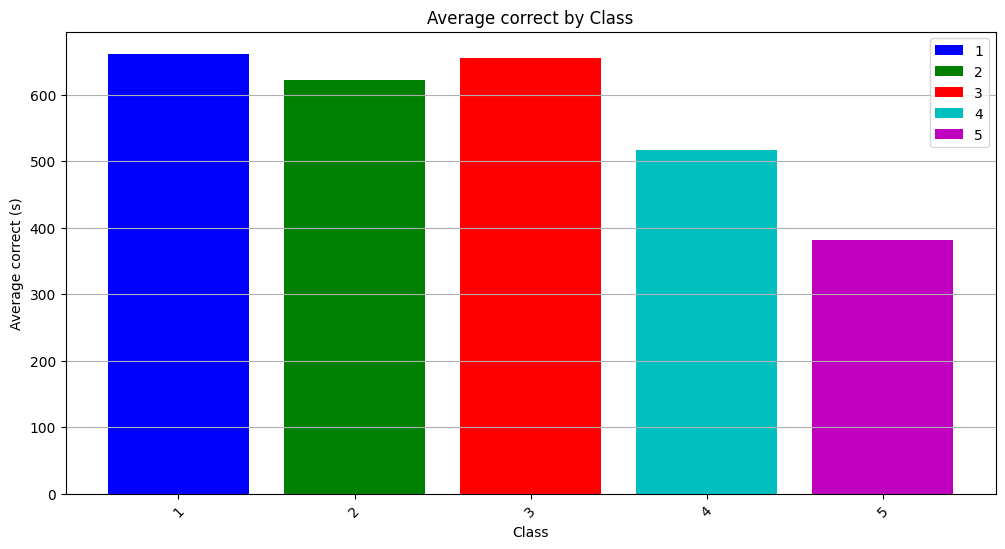

In [ ]:
average_features_by_class = df.groupby('class')[headers[:-2]].mean().reset_index()

# Define colors for each class
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# Plotting separate bar graphs for each feature
features = headers[:-2]

for feature in features:
    plt.figure(figsize=(12, 6))

    # Loop through each class and plot the bar
    for i, cls in enumerate(average_features_by_class['class']):
        plt.bar(cls, average_features_by_class.loc[i, feature], color=colors[i], label=cls)

    plt.xlabel('Class')
    plt.ylabel(f'Average {feature} (s)')
    plt.title(f'Average {feature} by Class')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.grid(axis='y')
    plt.savefig(f"/content/{feature}_by_Class.png")
    plt.show()

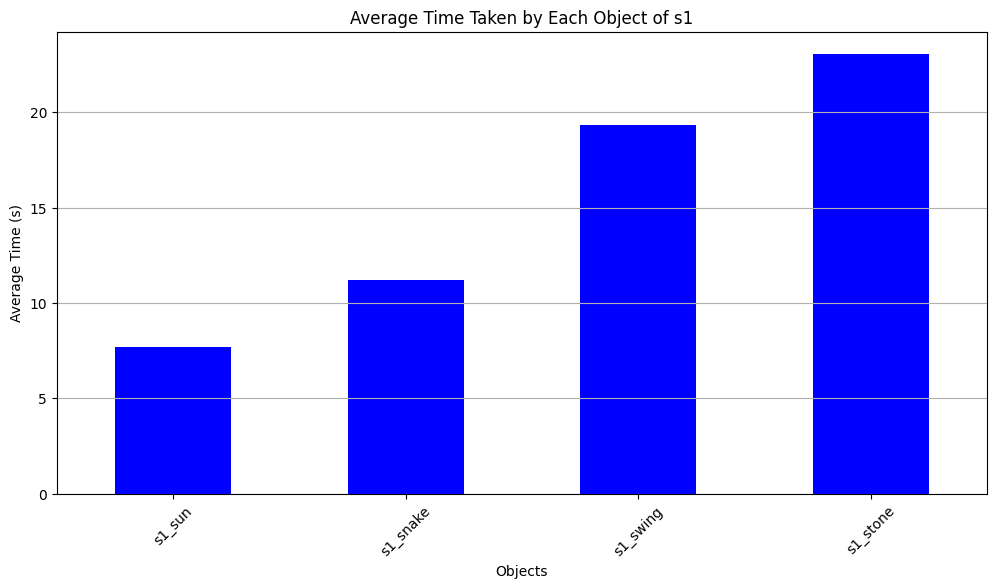

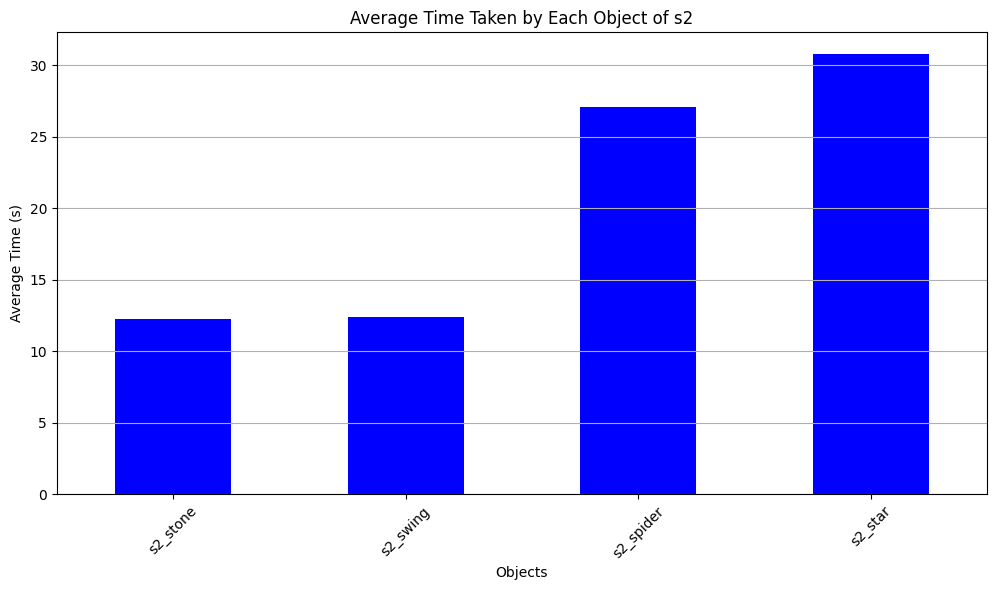

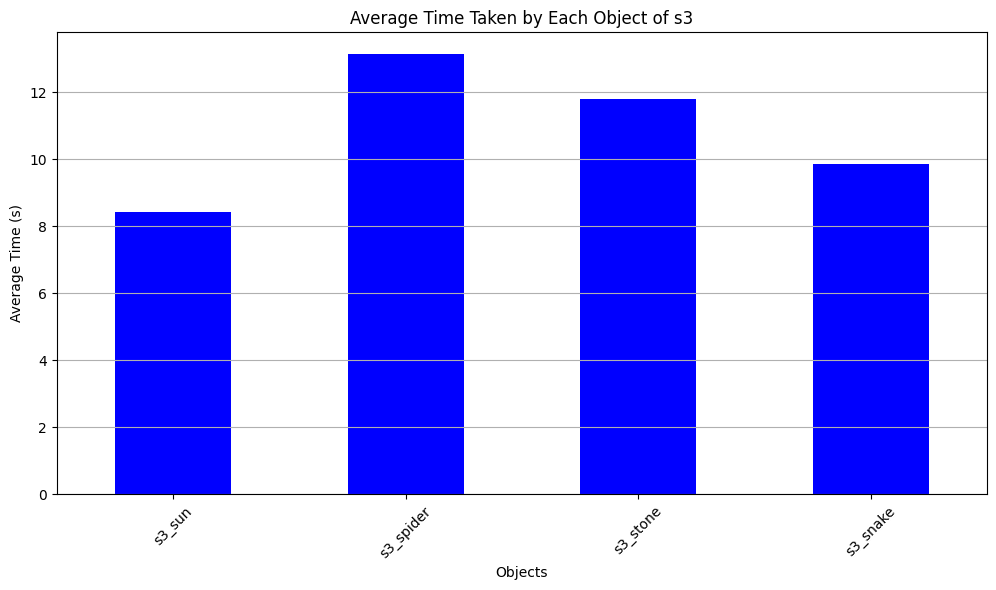

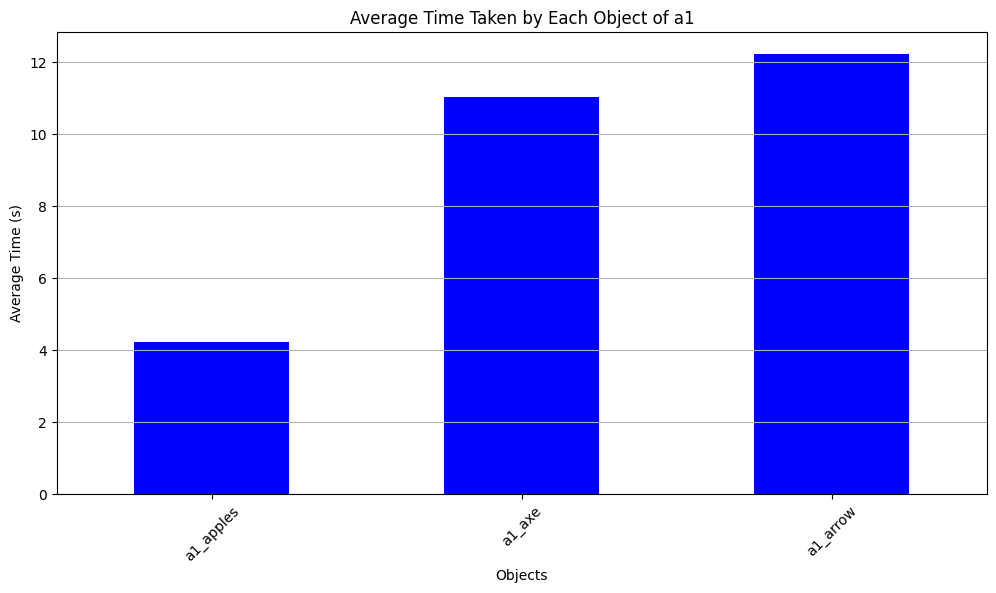

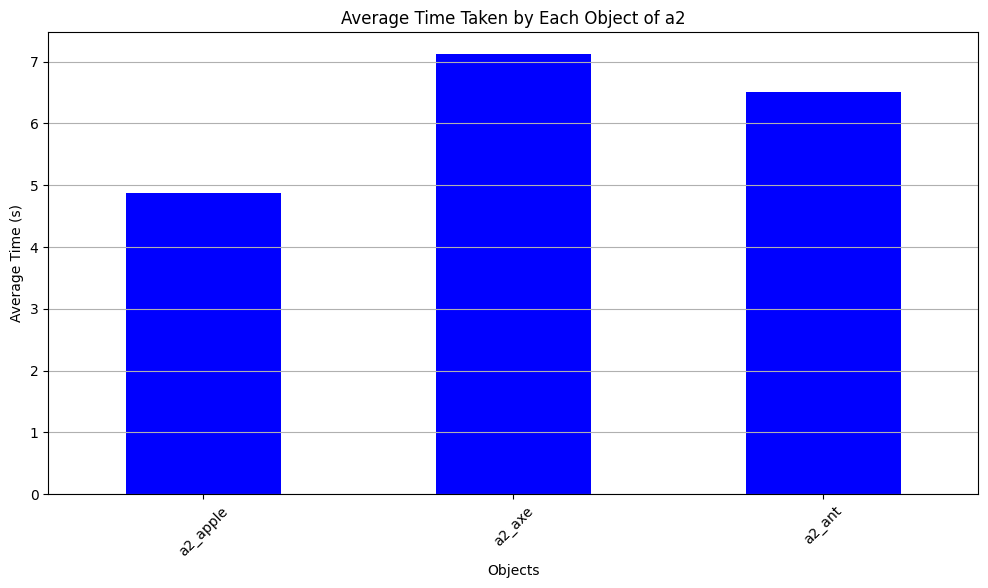

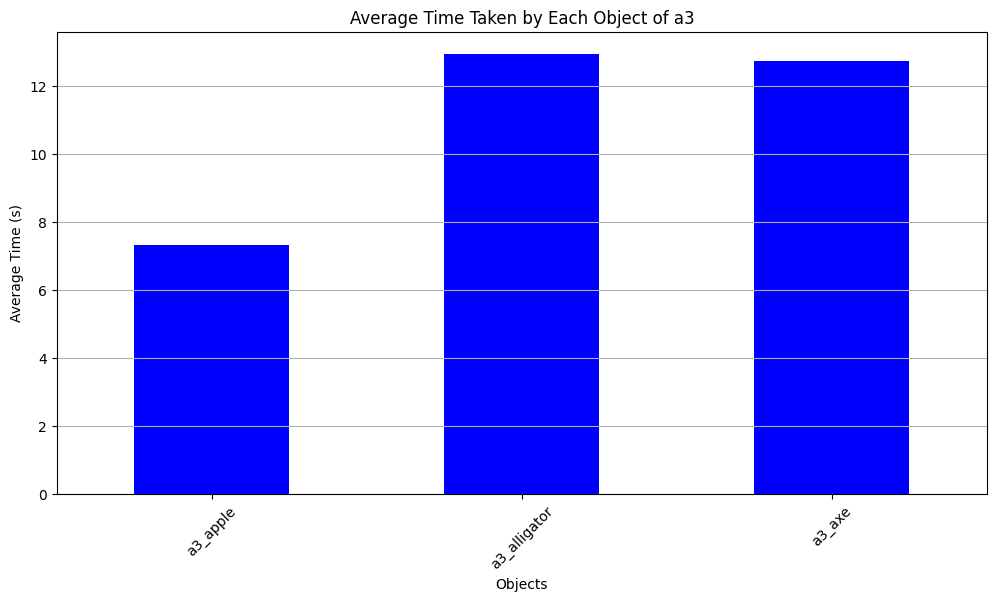

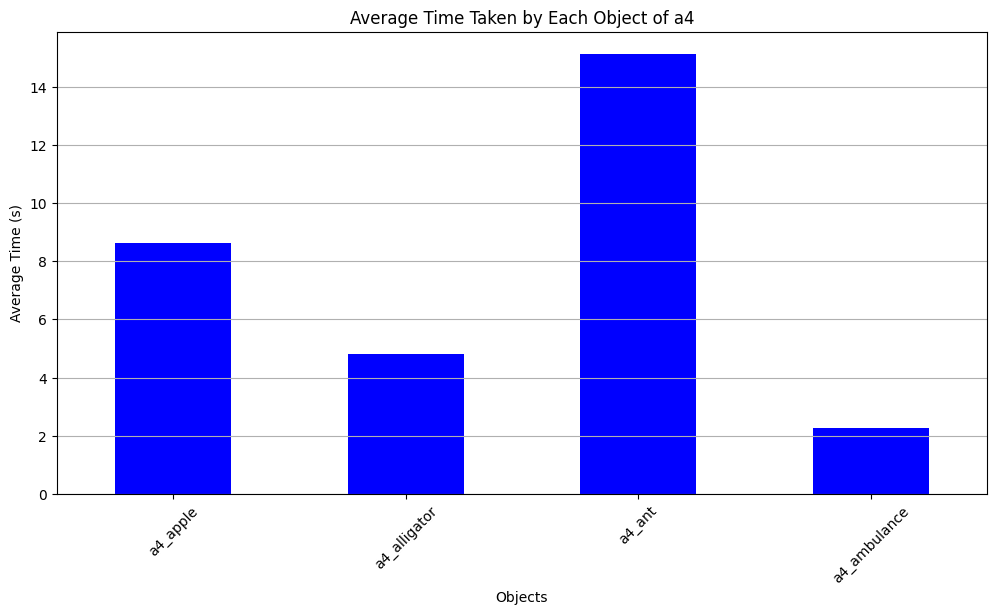

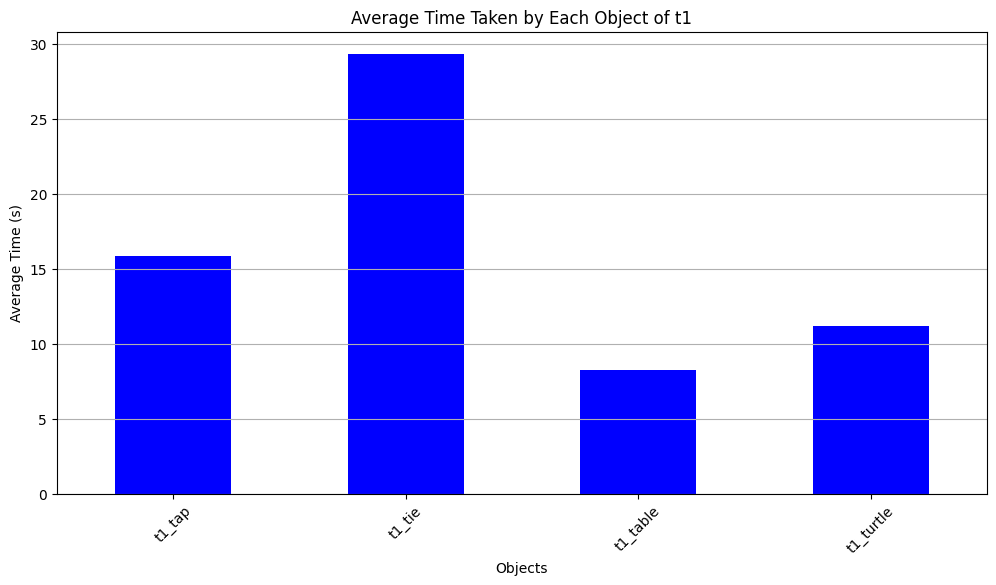

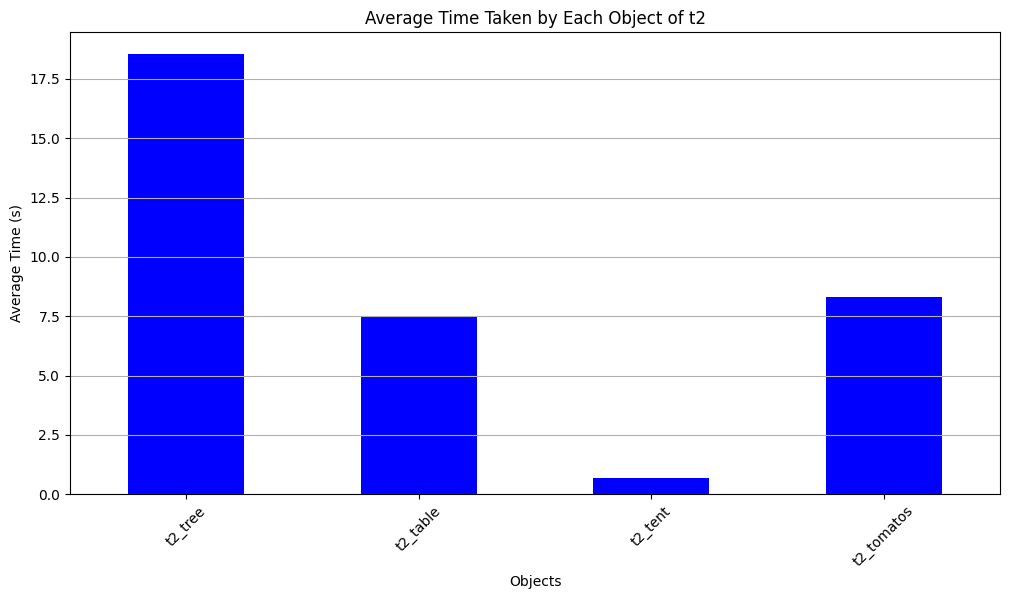

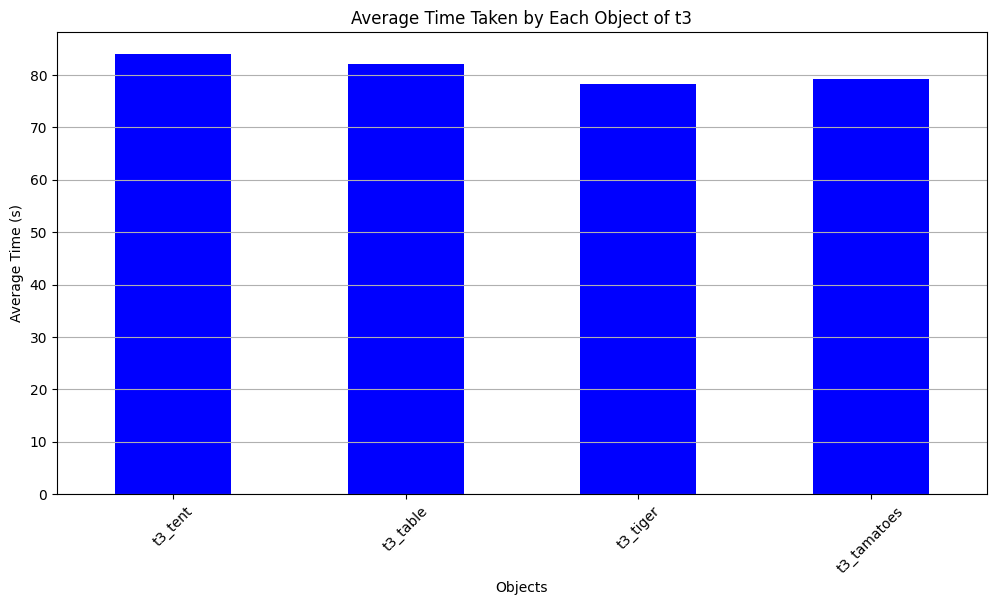

In [ ]:
columns_to_plot = {
    's1': ['s1_sun', 's1_snake', 's1_swing', 's1_stone'],
    's2': ['s2_stone', 's2_swing', 's2_spider', 's2_star'],
    's3': ['s3_sun', 's3_spider', 's3_stone', 's3_snake'],
    'a1': ['a1_apples', 'a1_axe', 'a1_arrow'],
    'a2': ['a2_apple', 'a2_axe', 'a2_ant'],
    'a3': ['a3_apple', 'a3_alligator', 'a3_axe'],
    'a4': ['a4_apple', 'a4_alligator', 'a4_ant', 'a4_ambulance'],
    't1': ['t1_tap', 't1_tie', 't1_table', 't1_turtle'],
    't2': ['t2_tree', 't2_table', 't2_tent', 't2_tomatos'],
    't3': ['t3_tent', 't3_table', 't3_tiger', 't3_tamatoes']
}

# Plotting the average time taken by each object for the specified columns
for col, objects in columns_to_plot.items():
    average_time_objects = df[objects].mean()

    plt.figure(figsize=(12, 6))
    average_time_objects.plot(kind='bar', color='blue')
    plt.xlabel('Objects')
    plt.ylabel('Average Time (s)')
    plt.title(f'Average Time Taken by Each Object of {col}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.savefig(f"/content/average_time_{col}_objects.png")
    plt.show()


In [ ]:
# Define the columns to check
columns_to_check = {
    's1': ['s1_sun', 's1_snake', 's1_swing', 's1_stone'],
    's2': ['s2_stone', 's2_swing', 's2_spider', 's2_star'],
    's3': ['s3_sun', 's3_spider', 's3_stone', 's3_snake'],
    'a1': ['a1_apples', 'a1_axe', 'a1_arrow'],
    'a2': ['a2_apple', 'a2_axe', 'a2_ant'],
    'a3': ['a3_apple', 'a3_alligator', 'a3_axe'],
    'a4': ['a4_apple', 'a4_alligator', 'a4_ant', 'a4_ambulance'],
    't1': ['t1_tap', 't1_tie', 't1_table', 't1_turtle'],
    't2': ['t2_tree', 't2_table', 't2_tent', 't2_tomatos'],
    't3': ['t3_tent', 't3_table', 't3_tiger', 't3_tamatoes']
}

# Identify outliers for each class and module
for class_name in df['class'].unique():
    class_df = df[df['class'] == class_name]

    for col, objects in columns_to_check.items():
        for obj in objects:
            z_scores = (class_df[obj] - class_df[obj].mean()) / class_df[obj].std()
            outliers = class_df[z_scores.abs() > 1.4]  # considering z-score > 2 as outlier

            if not outliers.empty:
                print(f"Class: {class_name}, Module: {col}, Object: {obj}")
                print(outliers[['name', obj]])
                print("-------------------------------")

Class: 1, Module: s1, Object: s1_swing
    name  s1_swing
6  Pooja    59.615
-------------------------------
Class: 1, Module: s2, Object: s2_swing
           name  s2_swing
0  vanshwardhan    56.513
-------------------------------
Class: 1, Module: s3, Object: s3_snake
    name  s3_snake
6  Pooja    26.894
-------------------------------
Class: 1, Module: a1, Object: a1_apples
           name  a1_apples
0  vanshwardhan      3.418
-------------------------------
Class: 1, Module: a1, Object: a1_arrow
       name  a1_arrow
10  Harshit    35.103
-------------------------------
Class: 1, Module: a2, Object: a2_ant
           name  a2_ant
0  vanshwardhan  26.358
-------------------------------
Class: 1, Module: a3, Object: a3_alligator
    name  a3_alligator
8  Dhruv        68.667
-------------------------------
Class: 1, Module: a3, Object: a3_axe
       name  a3_axe
10  Harshit  45.451
-------------------------------
Class: 1, Module: t2, Object: t2_tomatos
    name  t2_tomatos
8  Dhruv 